In [1]:
import pandas as pd
from pathlib import Path
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
grandparent_dir = Path('/home/user0/data')

temps = range(300, 350+1, 50) # T = 300, T = 325, T = 350, T = 375 
nts   = range(20,  30+1,  10) # start: 20, stop: 31 (exclusive), step: 10
cohs  = range(15,  25+1,   5)
nafls = range( 3,  11+1,   4)

D = ("2.7nm", "4.0nm")
############################################################################
# wats03_nt20 = [200,] + list(range(300, 400+1, 100))   
# wats07_nt20 = [222,] + list(range(300, 700+1, 100))          # = (222, 300, 400, 500, 600, 700)
# wats11_nt20 = [222,] + list(range(400, 800+1, 100))
wats03_nt20 = [0,] + list(range(300, 400+1, 100))   
wats07_nt20 = [0,] + list(range(300, 700+1, 100))          # = (222, 300, 400, 500, 600, 700)
wats11_nt20 = [0,] +list(range(400, 800+1, 100))

# wats03_nt30 = [500,] + list(range(600,   700+1, 100))
# wats07_nt30 = [500,] + list(range(800,  1200+1, 100))
# wats11_nt30 = [500,] + list(range(1300, 1700+1, 100))
wats03_nt30 = [0,] + list(range(600,   700+1, 100))
wats07_nt30 = [0,] +list(range(800,  1200+1, 100))
wats11_nt30 = [0,] +list(range(1300, 1700+1, 100))

# parent_dirs = list[f"COHCH_gra_t{i}" for i in temps)         # = ('COHCH_gra_t300', 'COHCH_gra_t325', 'COHCH_gra_t350', 'COHCH_gra_t375')
############################################################################

for temp in temps:
    parent_dir = str(f"COHCH_gra_t{temp}")
    print(f"T={temp}")
    
    for nt in nts:
        print(f"T={temp} & nt={nt}")
        print("")

        for nafl in nafls:
            match (nafl, nt):
                case (3,  20):
                    wats = wats03_nt20 
                case (7,  20):
                    wats = wats07_nt20 
                case (11, 20):
                    wats = wats11_nt20 
                case (3,  30):
                    wats = wats03_nt30 
                case (7,  30):
                    wats = wats07_nt30 
                case (11, 30):
                    wats = wats11_nt30 

            for coh in cohs:
                for wat in wats:
                    child_dir  = f"nt{nt}-coh{coh}-nafl{nafl}-t{temp}-wat{wat}"
                    child_dir_path = Path(grandparent_dir/parent_dir/child_dir/"output_analysis")
                    
                    count_Ow_above_tube_path = Path(child_dir_path/"above_tube"/"count_Ow.dat")
                    count_Oh_above_tube_path = Path(child_dir_path/"above_tube"/"count_Oh.dat")
                    count_Ow_in_tube_path    = Path(child_dir_path/"in_tube"/"count_Ow.dat")
                    count_Oh_in_tube_path    = Path(child_dir_path/"in_tube"/"count_Oh.dat") 
                    
                    print(f"file {count_Ow_above_tube_path} exits? {count_Ow_above_tube_path.exists()}")
                    print(f"file {count_Oh_above_tube_path} exits? {count_Oh_above_tube_path.exists()}")
                    print(f"file {count_Ow_in_tube_path}    exits? {count_Ow_in_tube_path.exists()}")
                    print(f"file {count_Oh_in_tube_path}    exits? {count_Oh_in_tube_path.exists()}")
                    print("")

                    if count_Ow_above_tube_path.exists() == False:
                        continue
                    if count_Oh_above_tube_path.exists() == False:
                        continue
                    if count_Ow_in_tube_path.exists()    == False:
                        continue
                    if count_Oh_in_tube_path.exists()    == False:
                        continue
        
        print("===============================================================================================")
    print("")
    print("===============================================================================================")
    print("===============================================================================================")                


T=300
T=300 & nt=20

file /home/user0/data/COHCH_gra_t300/nt20-coh15-nafl3-t300-wat0/output_analysis/above_tube/count_Ow.dat exits? True
file /home/user0/data/COHCH_gra_t300/nt20-coh15-nafl3-t300-wat0/output_analysis/above_tube/count_Oh.dat exits? True
file /home/user0/data/COHCH_gra_t300/nt20-coh15-nafl3-t300-wat0/output_analysis/in_tube/count_Ow.dat    exits? True
file /home/user0/data/COHCH_gra_t300/nt20-coh15-nafl3-t300-wat0/output_analysis/in_tube/count_Oh.dat    exits? True

file /home/user0/data/COHCH_gra_t300/nt20-coh15-nafl3-t300-wat300/output_analysis/above_tube/count_Ow.dat exits? True
file /home/user0/data/COHCH_gra_t300/nt20-coh15-nafl3-t300-wat300/output_analysis/above_tube/count_Oh.dat exits? True
file /home/user0/data/COHCH_gra_t300/nt20-coh15-nafl3-t300-wat300/output_analysis/in_tube/count_Ow.dat    exits? True
file /home/user0/data/COHCH_gra_t300/nt20-coh15-nafl3-t300-wat300/output_analysis/in_tube/count_Oh.dat    exits? True

file /home/user0/data/COHCH_gra_t300/nt20

In [3]:

DataFrame_dict_Ow_above_tube = {}
DataFrame_dict_Oh_above_tube = {}
DataFrame_dict_Ow_in_tube = {}
DataFrame_dict_Oh_in_tube = {} 

dicts_list = [ DataFrame_dict_Ow_above_tube, 
               DataFrame_dict_Oh_above_tube, 
               DataFrame_dict_Ow_in_tube, 
               DataFrame_dict_Oh_in_tube,]

######################################
for temp in temps:
    parent_dir = str(f"COHCH_gra_t{temp}")

    for nt in nts:
        for nafl in nafls:
            match (nafl, nt):
                case (3, 20):
                    wats = wats03_nt20 
                case (7, 20):
                    wats = wats07_nt20 
                case (11, 20):
                    wats = wats11_nt20 
                case (3, 30):
                    wats = wats03_nt30 
                case (7, 30):
                    wats = wats07_nt30 
                case (11, 30):
                    wats = wats11_nt30
            
            for coh in cohs:
                

                for wat in wats:
                    child_dir  = f"nt{nt}-coh{coh}-nafl{nafl}-t{temp}-wat{wat}"
                    child_dir_path = Path(grandparent_dir/parent_dir/child_dir)
##################################################################
                    # if Path(child_dir_path/"restart_system.5000000").exists() == False:
                    #     print(f"{child_dir_path}  \t: calc. NOT completed")
##################################################################                    
                    grandchild_dir_path = Path(grandparent_dir/parent_dir/child_dir/"output_analysis")

                    count_Ow_above_tube_path = Path(grandchild_dir_path/"above_tube"/"count_Ow.dat")
                    count_Oh_above_tube_path = Path(grandchild_dir_path/"above_tube"/"count_Oh.dat")
                    
                    count_Ow_in_tube_path    = Path(grandchild_dir_path/"in_tube"/"count_Ow.dat")
                    count_Oh_in_tube_path    = Path(grandchild_dir_path/"in_tube"/"count_Oh.dat") 
                    
                    paths_tuple = (count_Ow_above_tube_path, 
                                   count_Oh_above_tube_path, 
                                   count_Ow_in_tube_path, 
                                   count_Oh_in_tube_path,)


                    count_Ow_above_tube_key = f"df_Ow_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"
                    count_Oh_above_tube_key = f"df_Ow_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"
                    count_Ow_in_tube_key    = f"df_Ow_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"
                    count_Oh_in_tube_key    = f"df_Ow_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"
                        
                    keys_tuple = (count_Ow_above_tube_key, 
                                  count_Oh_above_tube_key, 
                                  count_Ow_in_tube_key, 
                                  count_Oh_in_tube_key,)
                    

                    for p in range(2,3+1,1):
                        
                        if paths_tuple[p].exists():
                            match p:
                                case 2 | 3:
                                    dicts_list[p][keys_tuple[p]] = pd.read_csv(paths_tuple[p], delim_whitespace=True, skiprows=4, on_bad_lines='skip')
                                    dicts_list[p][keys_tuple[p]] = dicts_list[p][keys_tuple[p]].dropna(axis=1)
                            
                            if not dicts_list[p][keys_tuple[p]].empty:
                                dicts_list[p][keys_tuple[p]].rename(columns={dicts_list[p][keys_tuple[p]].columns[0]: 'time (ns)'}, inplace=True)
                            
                            if len(dicts_list[p][keys_tuple[p]].columns) > 1:
                                match p:
                                    case 2:
                                        dicts_list[p][keys_tuple[p]].\
                                            rename(columns={dicts_list[p][keys_tuple[p]].columns[1]: 'number (water molecules)'}, inplace=True)
                                    case 3:
                                        dicts_list[p][keys_tuple[p]].\
                                            rename(columns={dicts_list[p][keys_tuple[p]].columns[1]: 'number (oxonium ions)'}, inplace=True)
                                        
                        else:
                            match p:
                                case 2:
                                    dicts_list[p][keys_tuple[p]] = pd.DataFrame(columns=['time (ns)', 'number (water molecules)'])
                                case 3:
                                    dicts_list[p][keys_tuple[p]] = pd.DataFrame(columns=['time (ns)', 'number (oxonium ions)'])

                    for p in range(0,1+1,1):
                        
                        if paths_tuple[p].exists():
                            match p:
                                case 0 | 1:
                                    dicts_list[p][keys_tuple[p]] = pd.read_csv(paths_tuple[p], delim_whitespace=True, skiprows=4)
                                    dicts_list[p][keys_tuple[p]] = dicts_list[p][keys_tuple[p]].dropna(axis=1)
                            
                            if not dicts_list[p][keys_tuple[p]].empty:
                                dicts_list[p][keys_tuple[p]].rename(columns={dicts_list[p][keys_tuple[p]].columns[0]: 'time (ns)'}, inplace=True)
                            
                            if len(dicts_list[p][keys_tuple[p]].columns) > 1:
                                match p:
                                    case 0:
                                        dicts_list[p][keys_tuple[p]].\
                                            rename(columns={dicts_list[p][keys_tuple[p]].columns[1]: 'number (water molecules)'}, inplace=True)
                                    case 1:
                                        dicts_list[p][keys_tuple[p]].\
                                            rename(columns={dicts_list[p][keys_tuple[p]].columns[1]: 'number (oxonium ions)'}, inplace=True)
                                        

                        # if paths_tuple[p+2].exists():
                            # dicts_list[p][keys_tuple[p]] = dicts_list[p+2][keys_tuple[p+2]].copy()
                            
                            # match p:
                            #     case 0:
                            #         dicts_list[p][keys_tuple[p]].iloc[:,1] = ((( nafl - 1 ) * 250 ) + wat ) - dicts_list[p][keys_tuple[p]].iloc[:,1]
                            #     case 1:
                            #         dicts_list[p][keys_tuple[p]].iloc[:,1] = 250 - dicts_list[p][keys_tuple[p]].iloc[:,1]
                                        
                        else:
                            match p:
                                case 0:
                                    dicts_list[p][keys_tuple[p]] = pd.DataFrame(columns=['time (ns)', 'number (water molecules)'])
                                case 1:
                                    dicts_list[p][keys_tuple[p]] = pd.DataFrame(columns=['time (ns)', 'number (oxonium ions)'])


print("")
print(DataFrame_dict_Ow_above_tube)

print(DataFrame_dict_Oh_above_tube)

print(DataFrame_dict_Oh_in_tube)

print(DataFrame_dict_Oh_in_tube)

# print(dicts_list[2])

# print(DataFrame_dict_Ow_above_tube)




{'df_Ow_nt20_coh15_nafl3_t300_wat0':        time (ns)  number (water molecules)
0          0.001                       500
1          0.002                       500
2          0.003                       500
3          0.004                       500
4          0.005                       500
...          ...                       ...
79995     79.996                       490
79996     79.997                       490
79997     79.998                       490
79998     79.999                       490
79999     80.000                       490

[80000 rows x 2 columns], 'df_Ow_nt20_coh15_nafl3_t300_wat300':        time (ns)  number (water molecules)
0          0.001                       501
1          0.002                       511
2          0.003                       512
3          0.004                       510
4          0.005                       517
...          ...                       ...
39995     39.996                       512
39996     39.997                     

<< T=300; diameter=2.7nm, coh=30, λ = 3 >>
1


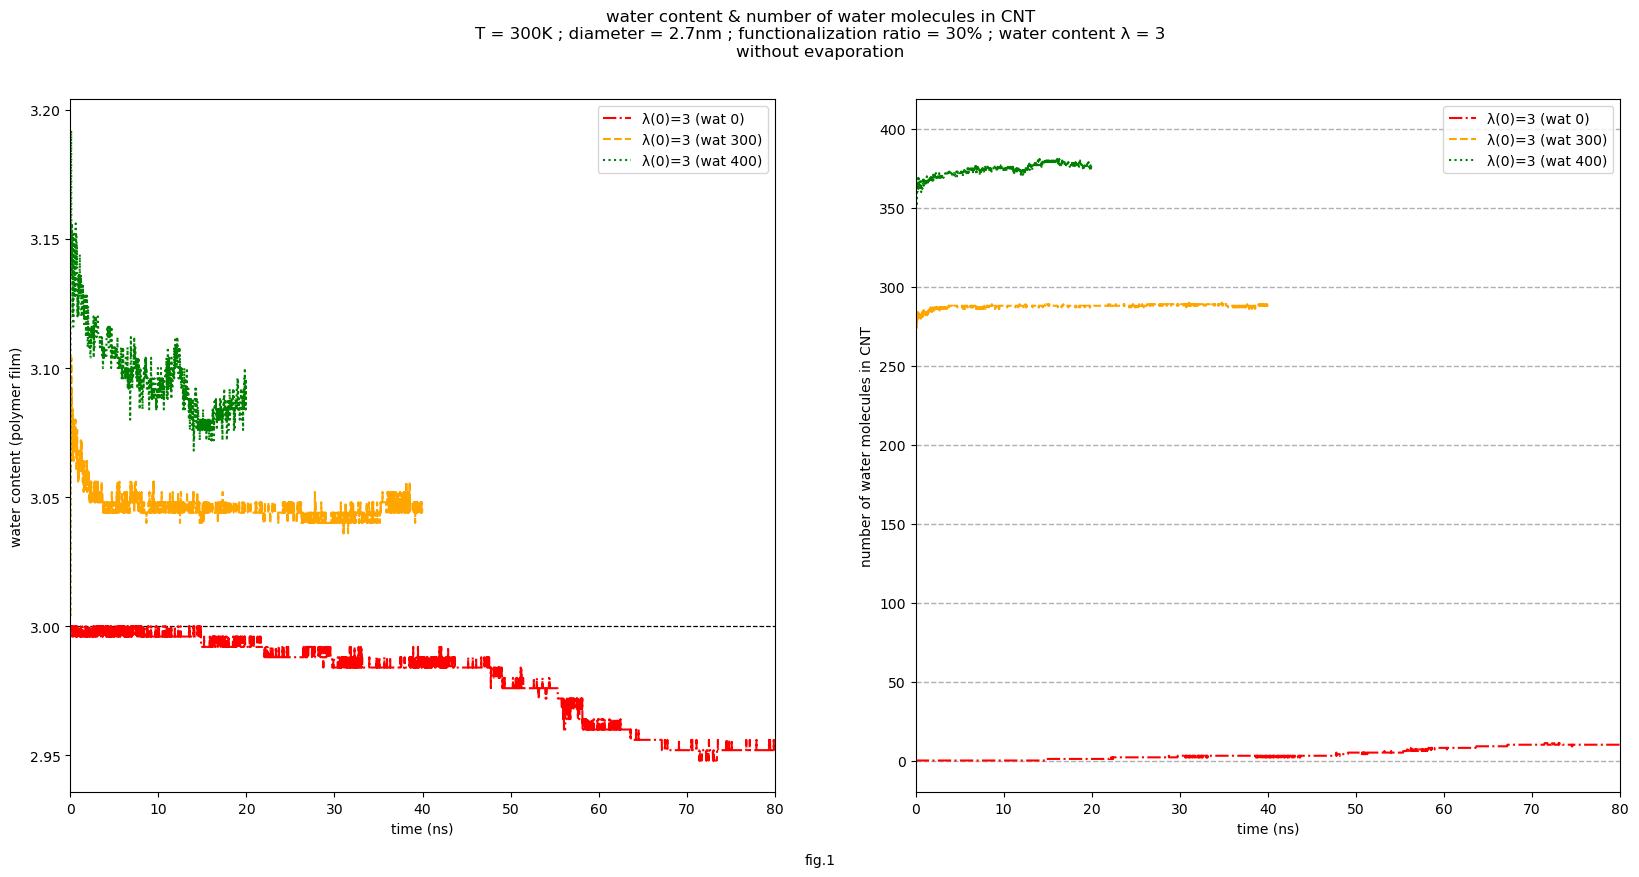

<< T=300; diameter=2.7nm, coh=30, λ = 7 >>
2


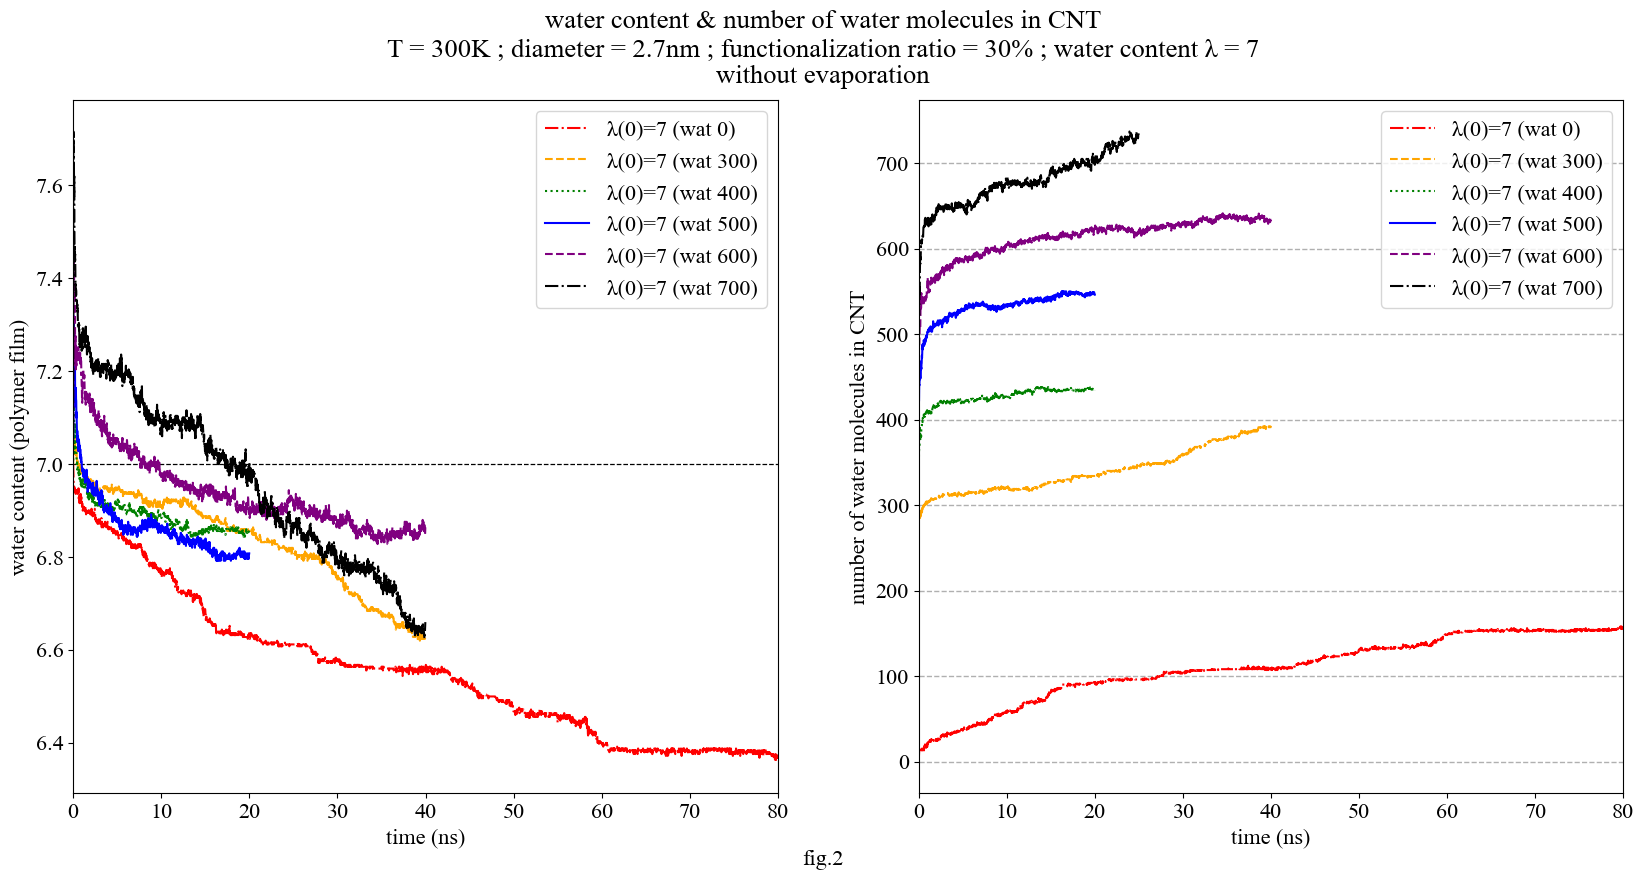

<< T=300; diameter=2.7nm, coh=30, λ = 11 >>
Key Error with df_Ow_nt20_coh15_nafl11_t300_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt20_coh15_nafl3_t300_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt20_coh15_nafl11_t300_wat0 [number (water molecules in CNT)]: Empty DataFrame
3


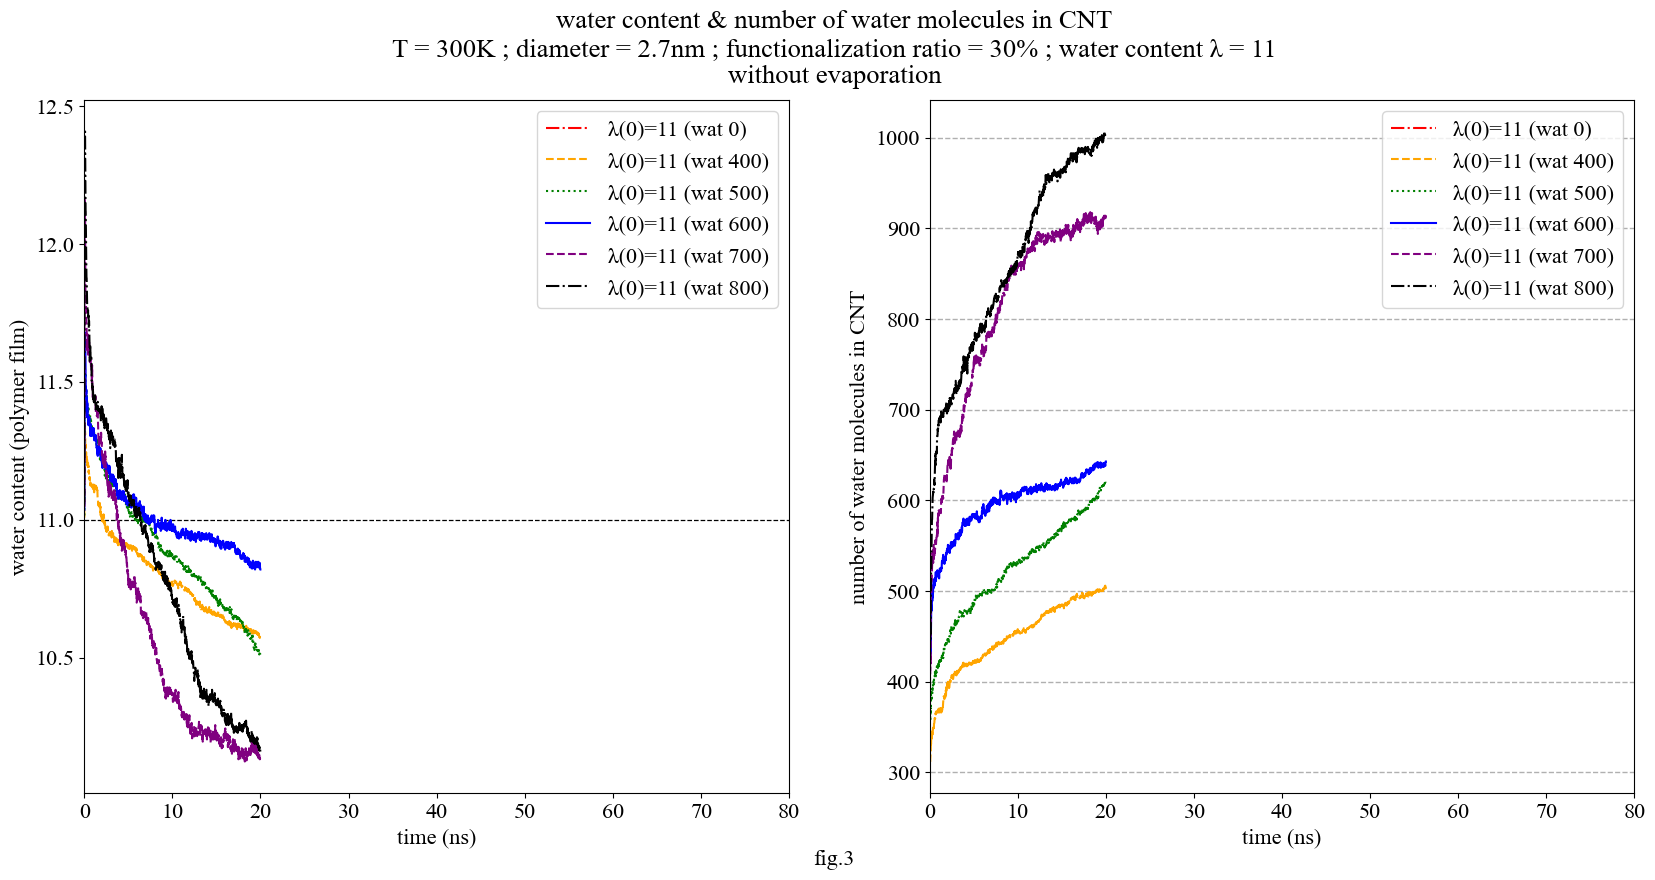

<< T=300; diameter=2.7nm, coh=40, λ = 3 >>
4


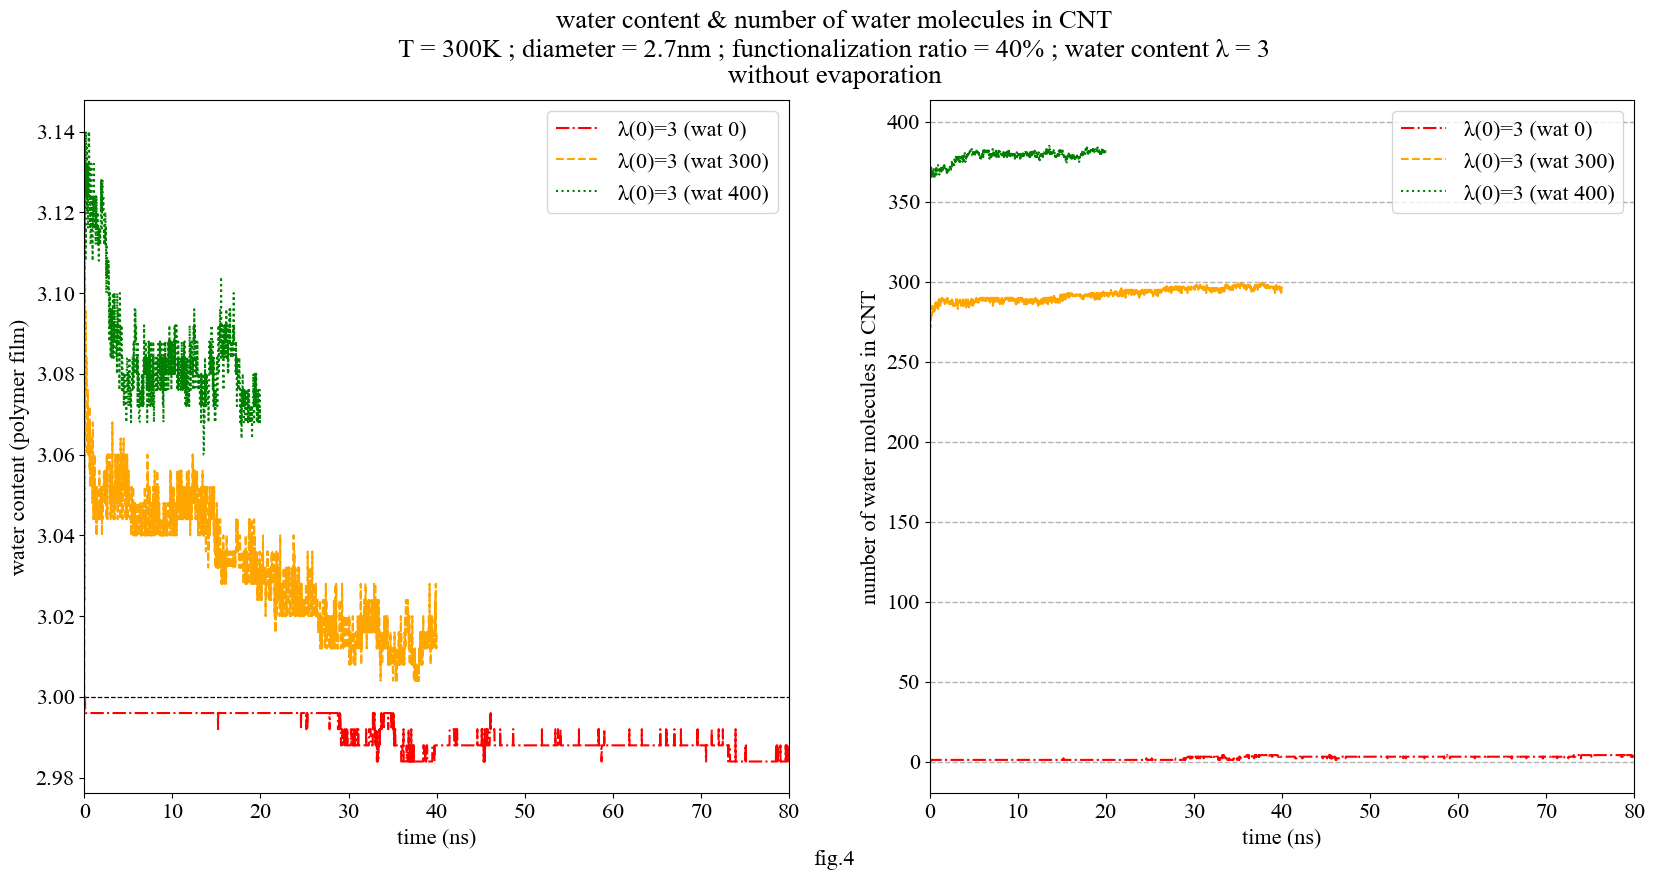

<< T=300; diameter=2.7nm, coh=40, λ = 7 >>
Index error with "/home/user0/data/COHCH_gra_t300/nt20-coh20-nafl7-t300-wat700"
Index error with "/work/B/NIa/NIa078/COHCH_gra_t300/nt20-coh20-nafl7-t300-wat700/output_analysis"
scp -r "/work/B/NIa/NIa078/COHCH_gra_t300/nt20-coh20-nafl7-t300-wat700/output_analysis" jihun@paolo000:"/home/user0/data/COHCH_gra_t300/nt20-coh20-nafl7-t300-wat700"

5


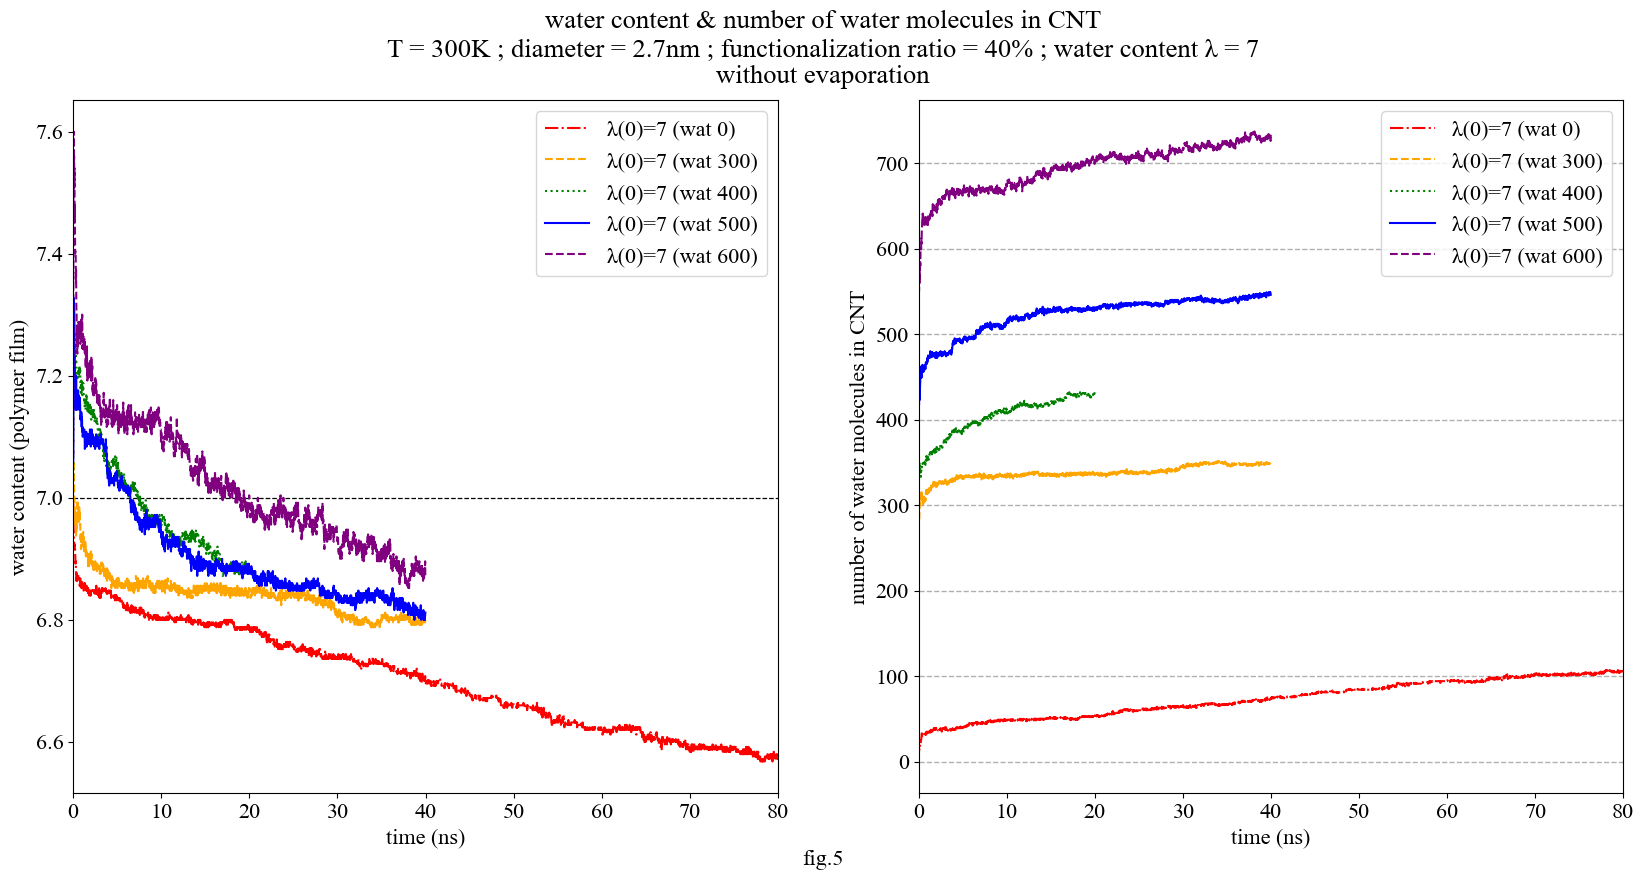

<< T=300; diameter=2.7nm, coh=40, λ = 11 >>
Key Error with df_Ow_nt20_coh20_nafl11_t300_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt20_coh20_nafl3_t300_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt20_coh20_nafl11_t300_wat0 [number (water molecules in CNT)]: Empty DataFrame
6


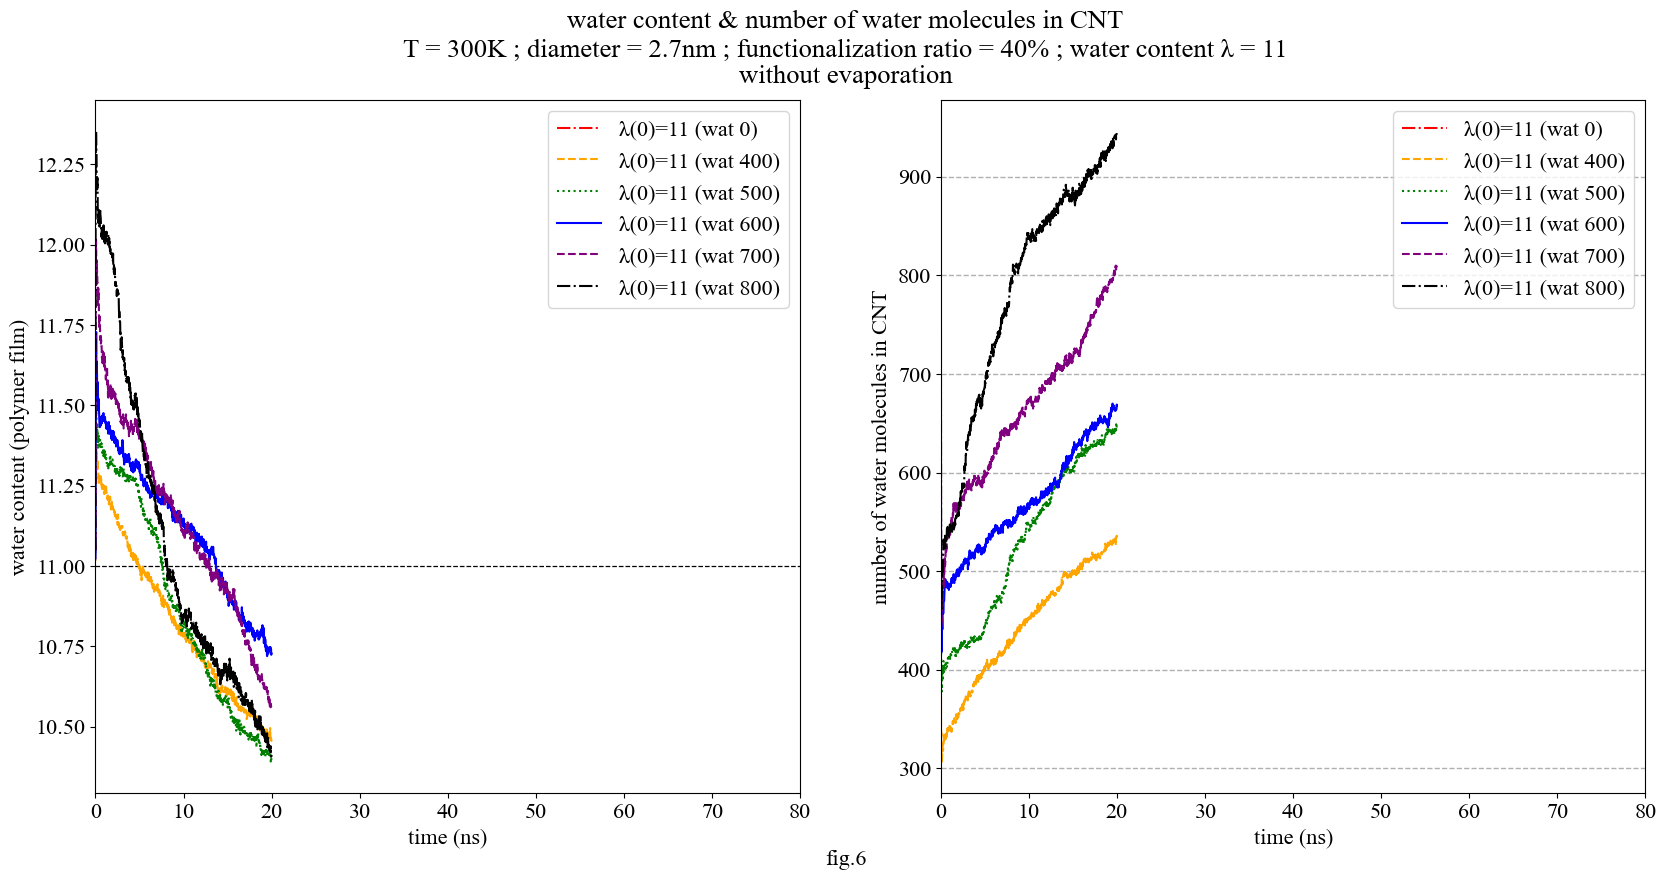

<< T=300; diameter=2.7nm, coh=50, λ = 3 >>
7


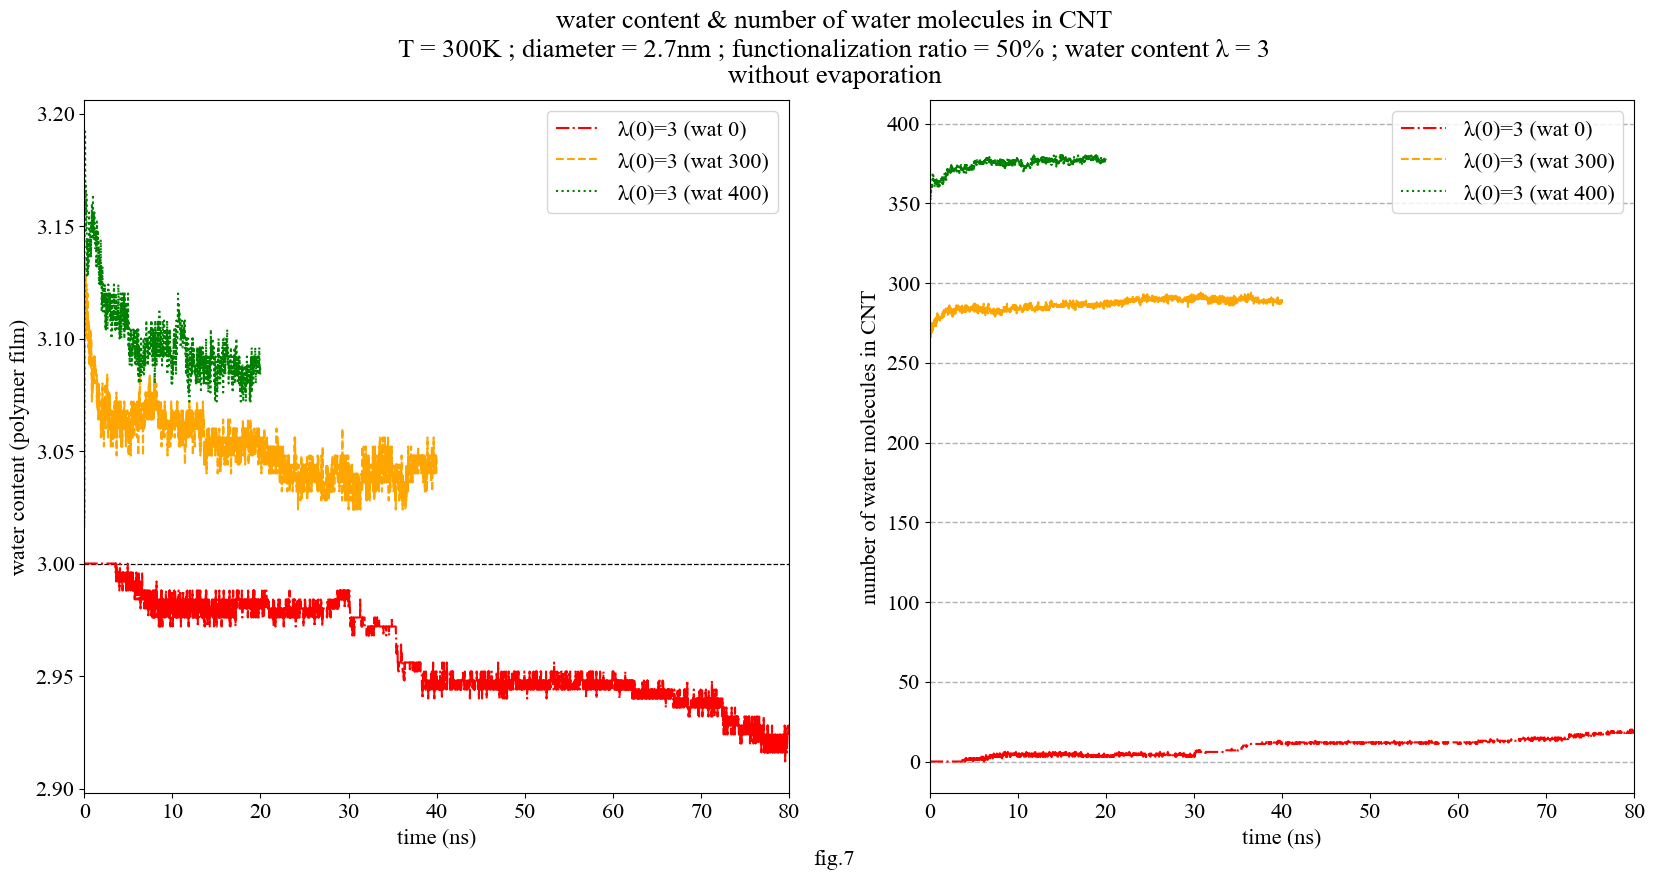

<< T=300; diameter=2.7nm, coh=50, λ = 7 >>
8


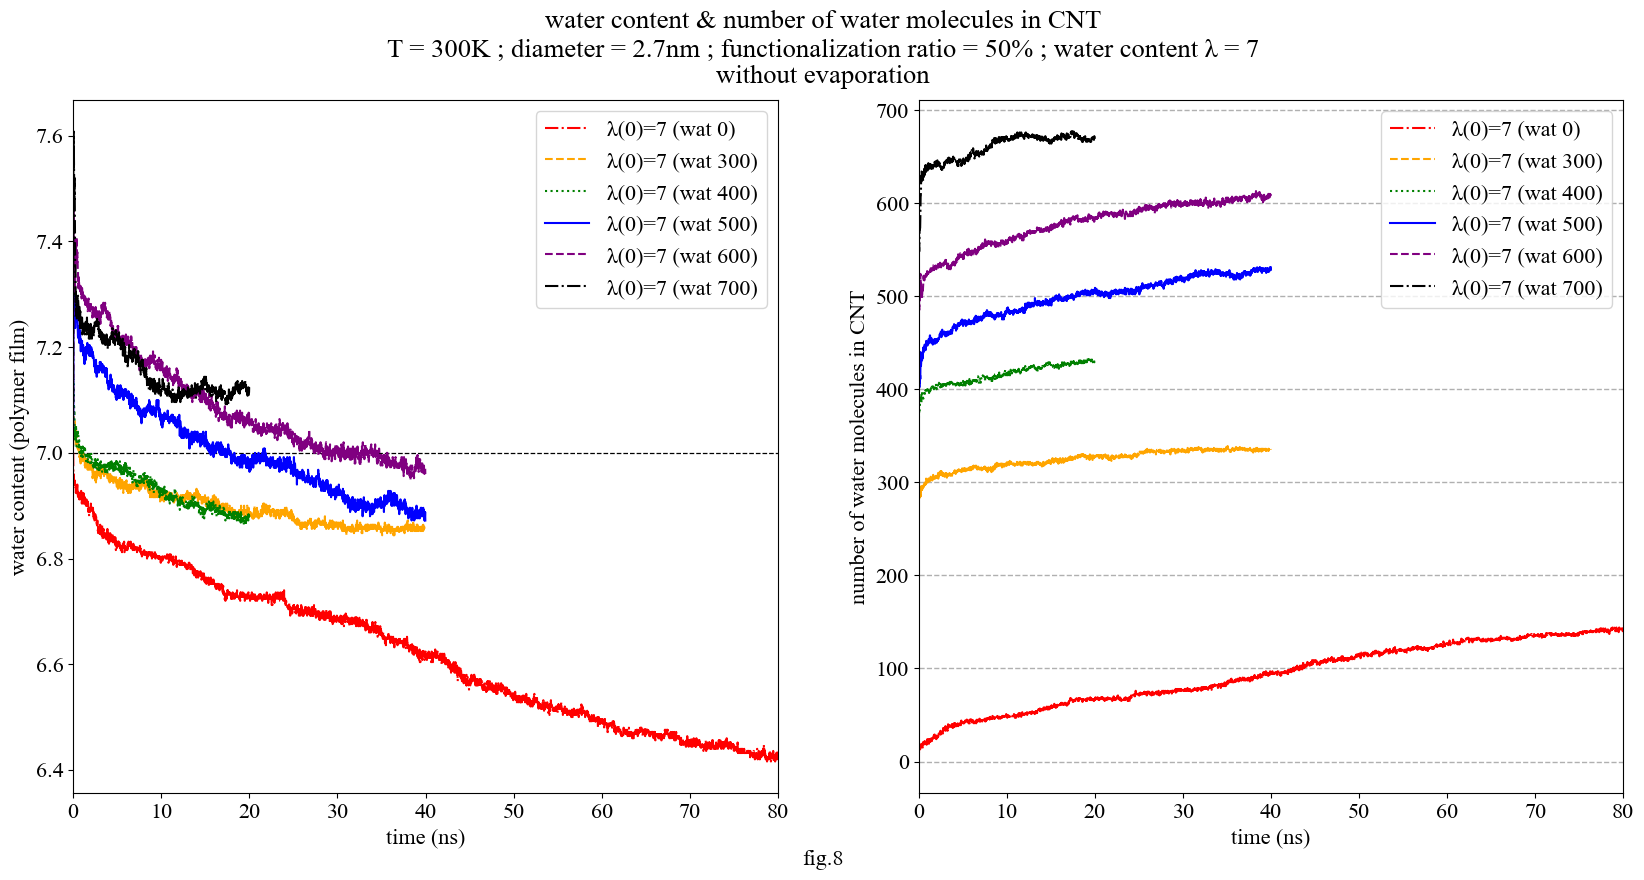

<< T=300; diameter=2.7nm, coh=50, λ = 11 >>
Key Error with df_Ow_nt20_coh25_nafl11_t300_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt20_coh25_nafl3_t300_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt20_coh25_nafl11_t300_wat0 [number (water molecules in CNT)]: Empty DataFrame
9


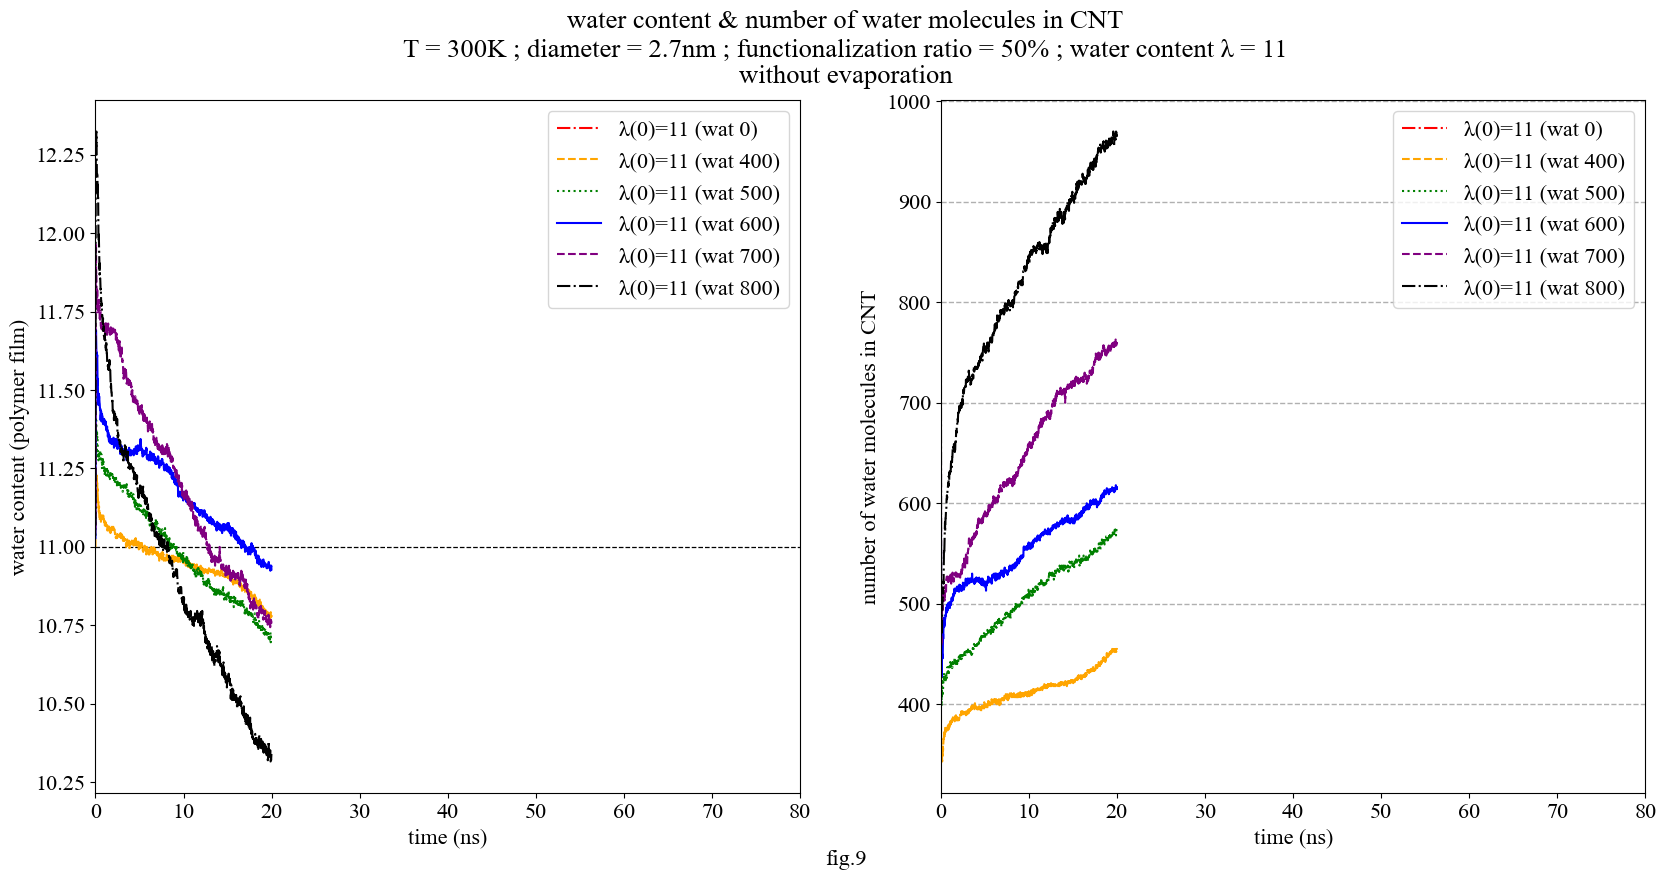

<< T=300; diameter=4.0nm, coh=30, λ = 3 >>
10


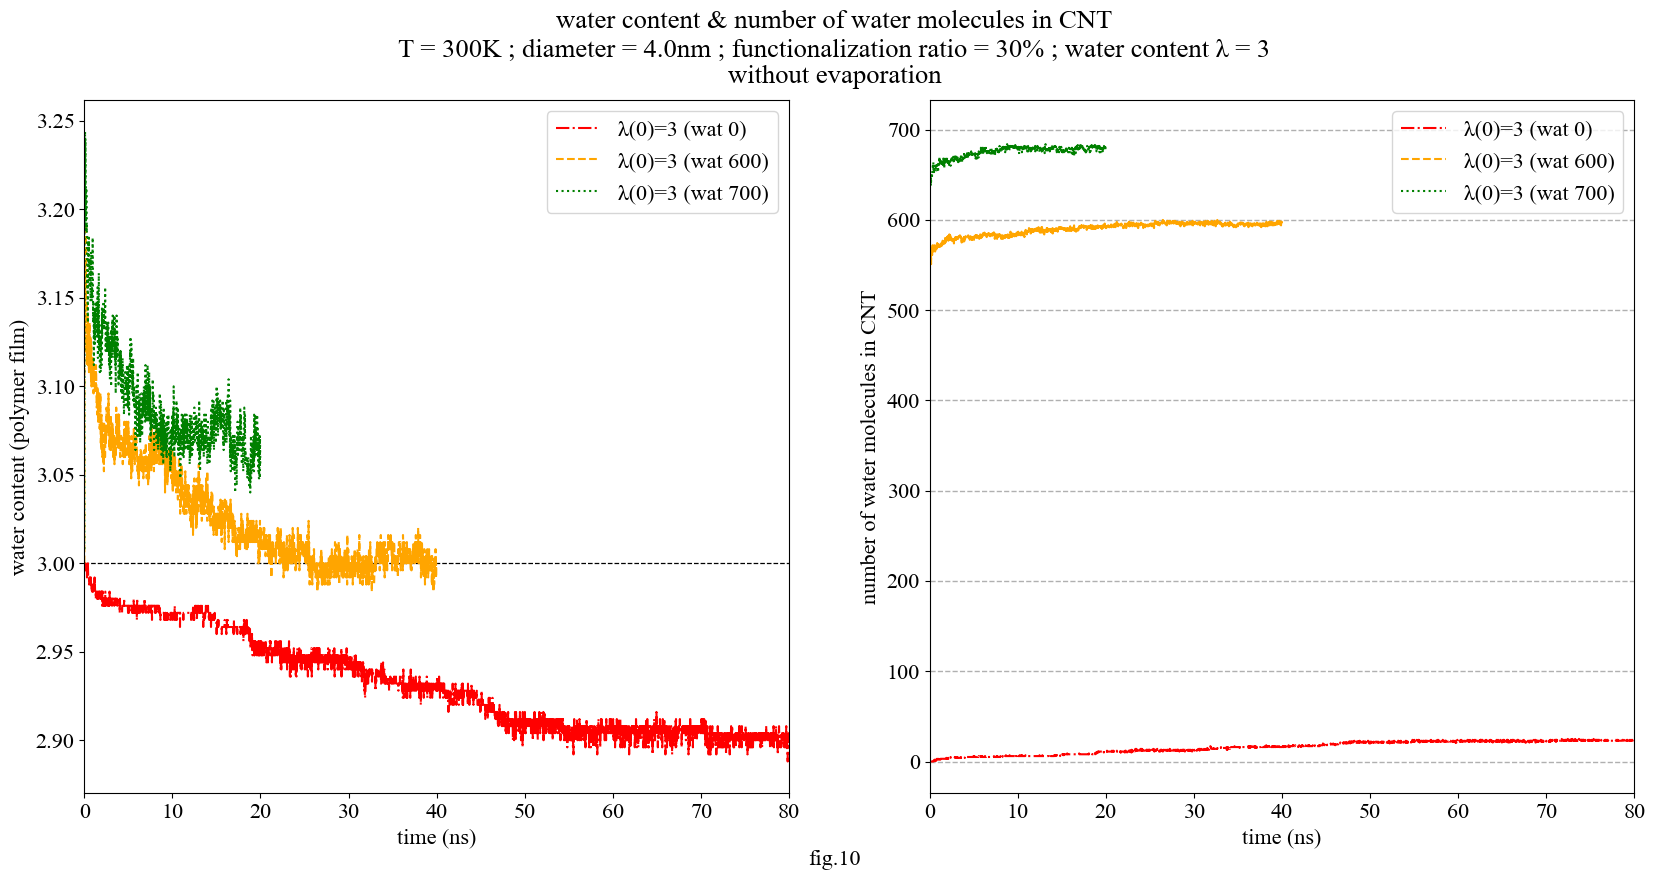

<< T=300; diameter=4.0nm, coh=30, λ = 7 >>
11


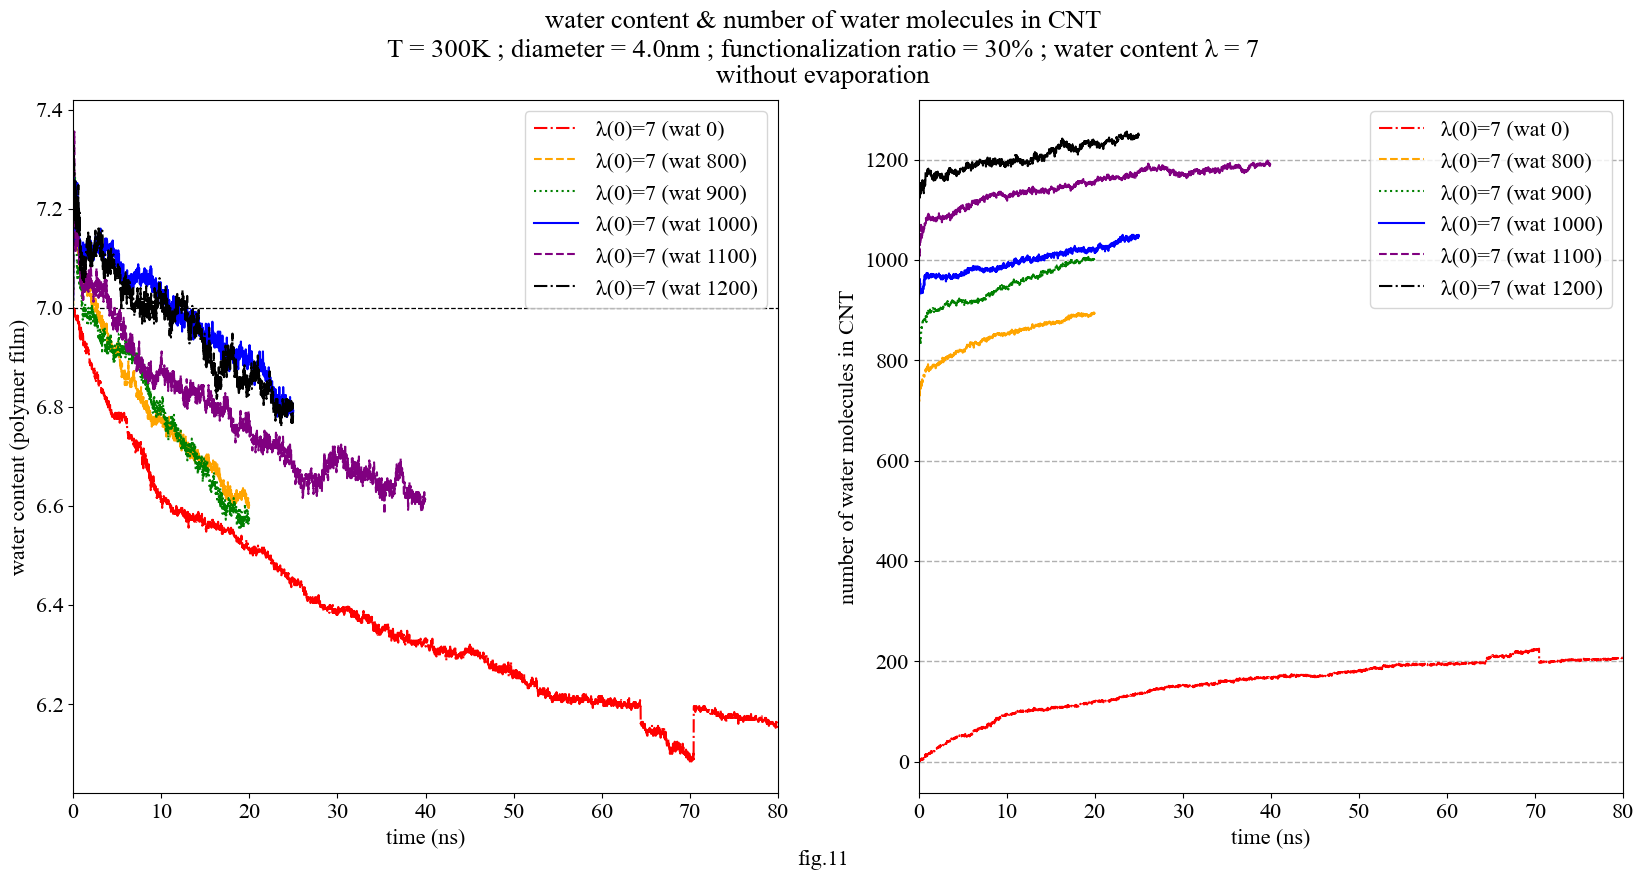

<< T=300; diameter=4.0nm, coh=30, λ = 11 >>
Key Error with df_Ow_nt30_coh15_nafl11_t300_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh15_nafl7_t300_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh15_nafl11_t300_wat0 [number (water molecules in CNT)]: Empty DataFrame
Key Error with df_Ow_nt30_coh15_nafl11_t300_wat1400 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh15_nafl7_t300_wat1400 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh15_nafl11_t300_wat1400 [number (water molecules in CNT)]: Empty DataFrame
Key Error with df_Ow_nt30_coh15_nafl11_t300_wat1500 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh15_nafl7_t300_wat1500 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh15_nafl11_t300_wat1500 [number (water molecules in CNT)]: Empty DataFrame
Key Error with df_Ow_nt30_coh15_nafl11_t300_wat1600 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh15_nafl7_t300_wat1600 [num

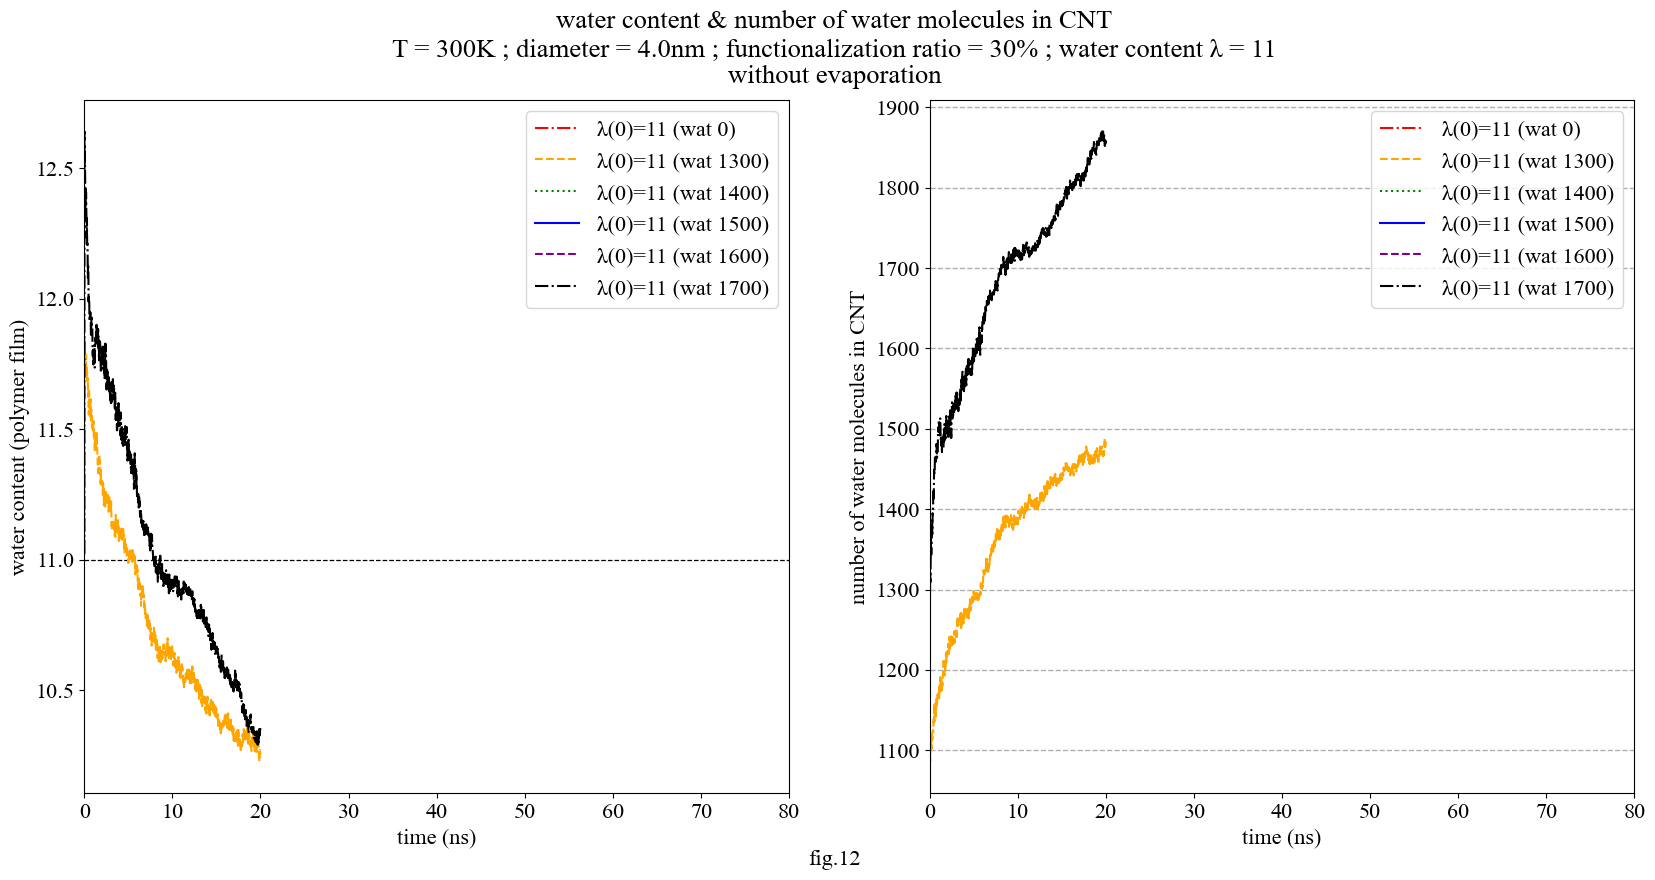

<< T=300; diameter=4.0nm, coh=40, λ = 3 >>
13


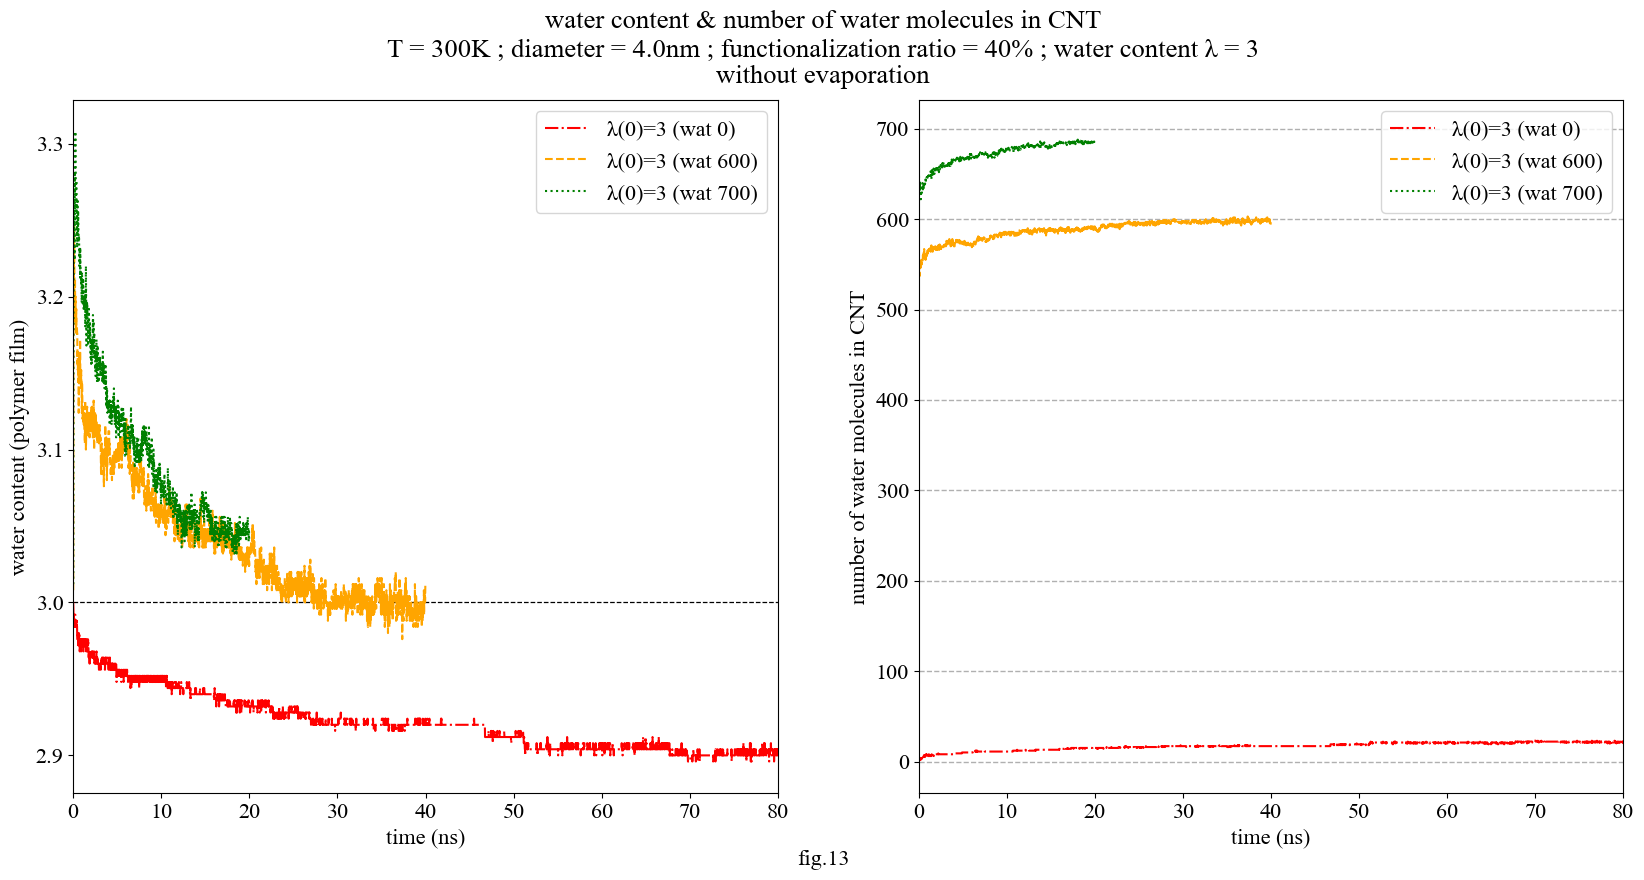

<< T=300; diameter=4.0nm, coh=40, λ = 7 >>
14


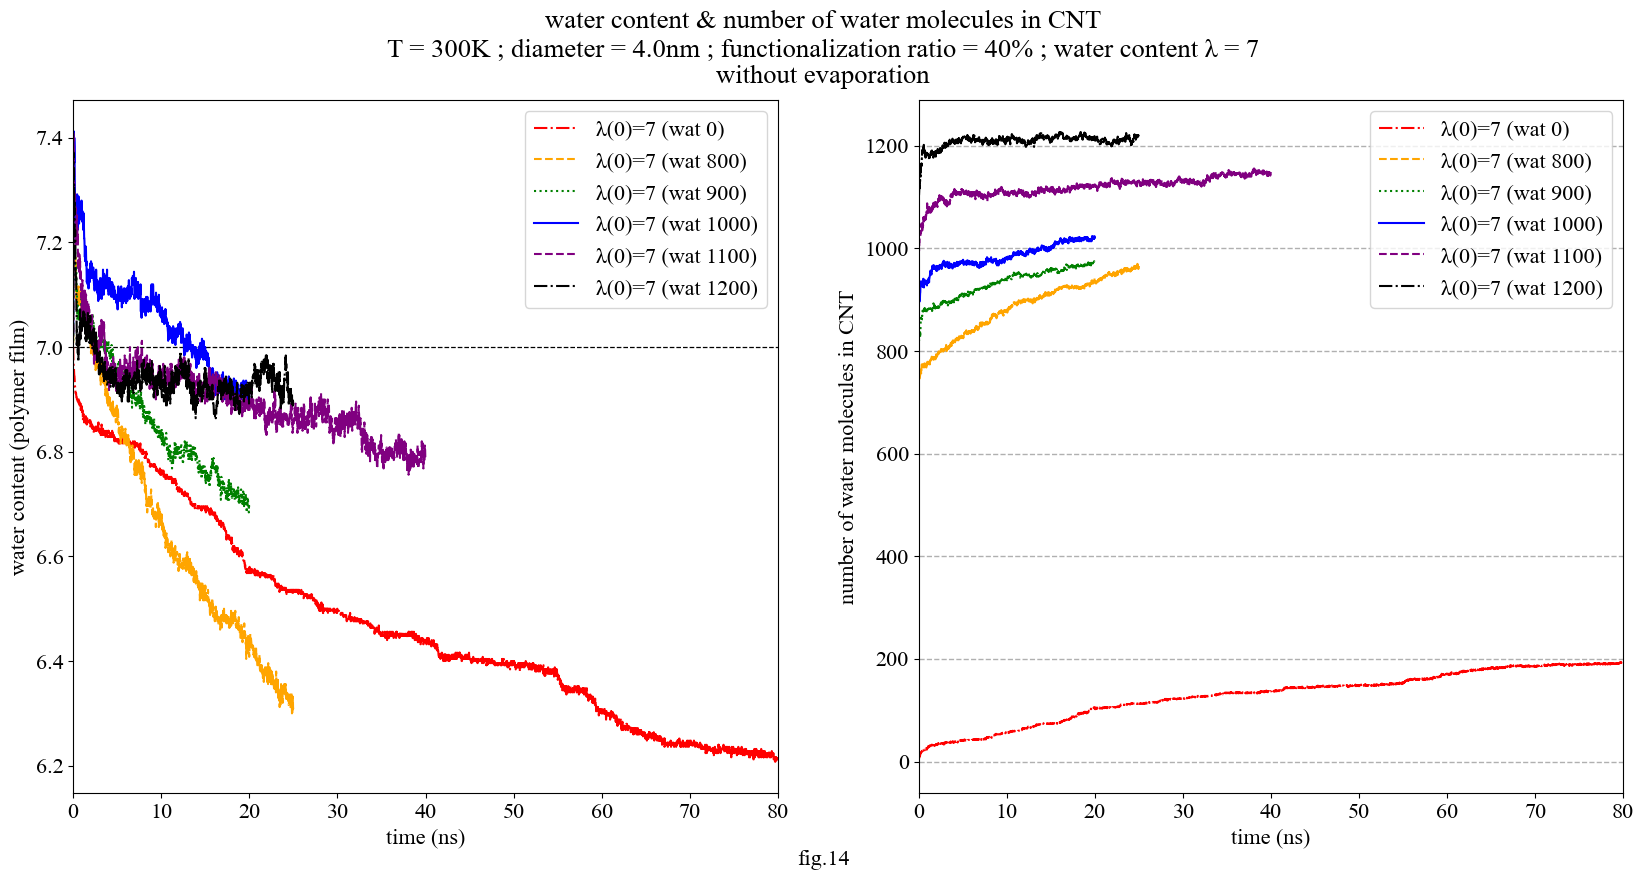

<< T=300; diameter=4.0nm, coh=40, λ = 11 >>
Key Error with df_Ow_nt30_coh20_nafl11_t300_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh20_nafl7_t300_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh20_nafl11_t300_wat0 [number (water molecules in CNT)]: Empty DataFrame
Key Error with df_Ow_nt30_coh20_nafl11_t300_wat1500 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh20_nafl7_t300_wat1500 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh20_nafl11_t300_wat1500 [number (water molecules in CNT)]: Empty DataFrame
Key Error with df_Ow_nt30_coh20_nafl11_t300_wat1600 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh20_nafl7_t300_wat1600 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh20_nafl11_t300_wat1600 [number (water molecules in CNT)]: Empty DataFrame
Key Error with df_Ow_nt30_coh20_nafl11_t300_wat1700 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh20_nafl7_t300_wat1700 [num

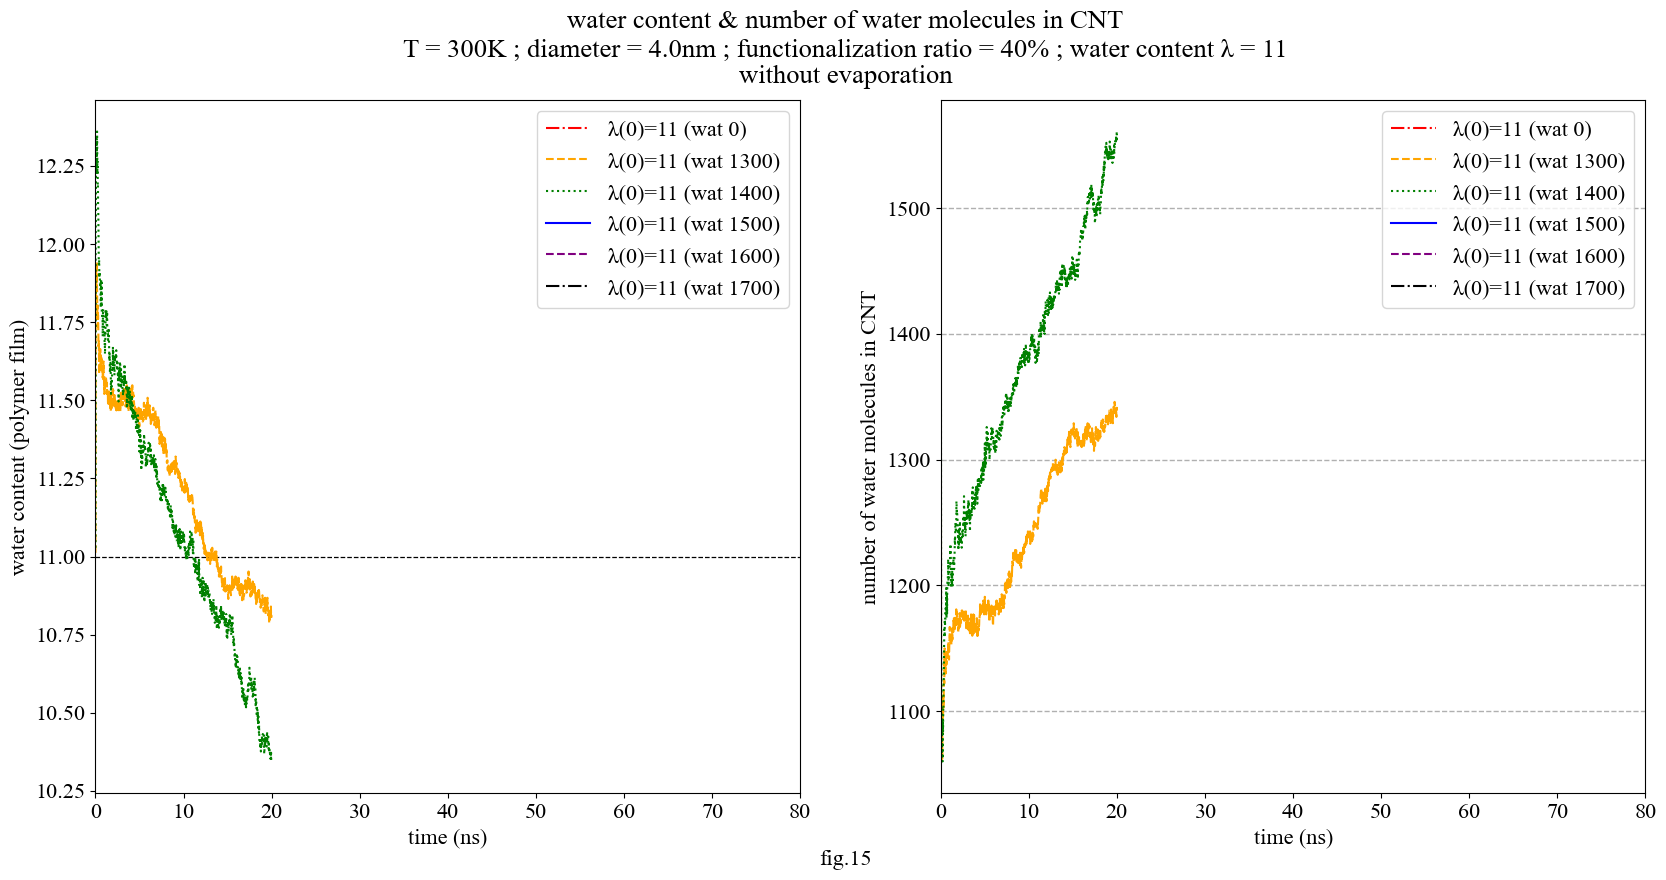

<< T=300; diameter=4.0nm, coh=50, λ = 3 >>
16


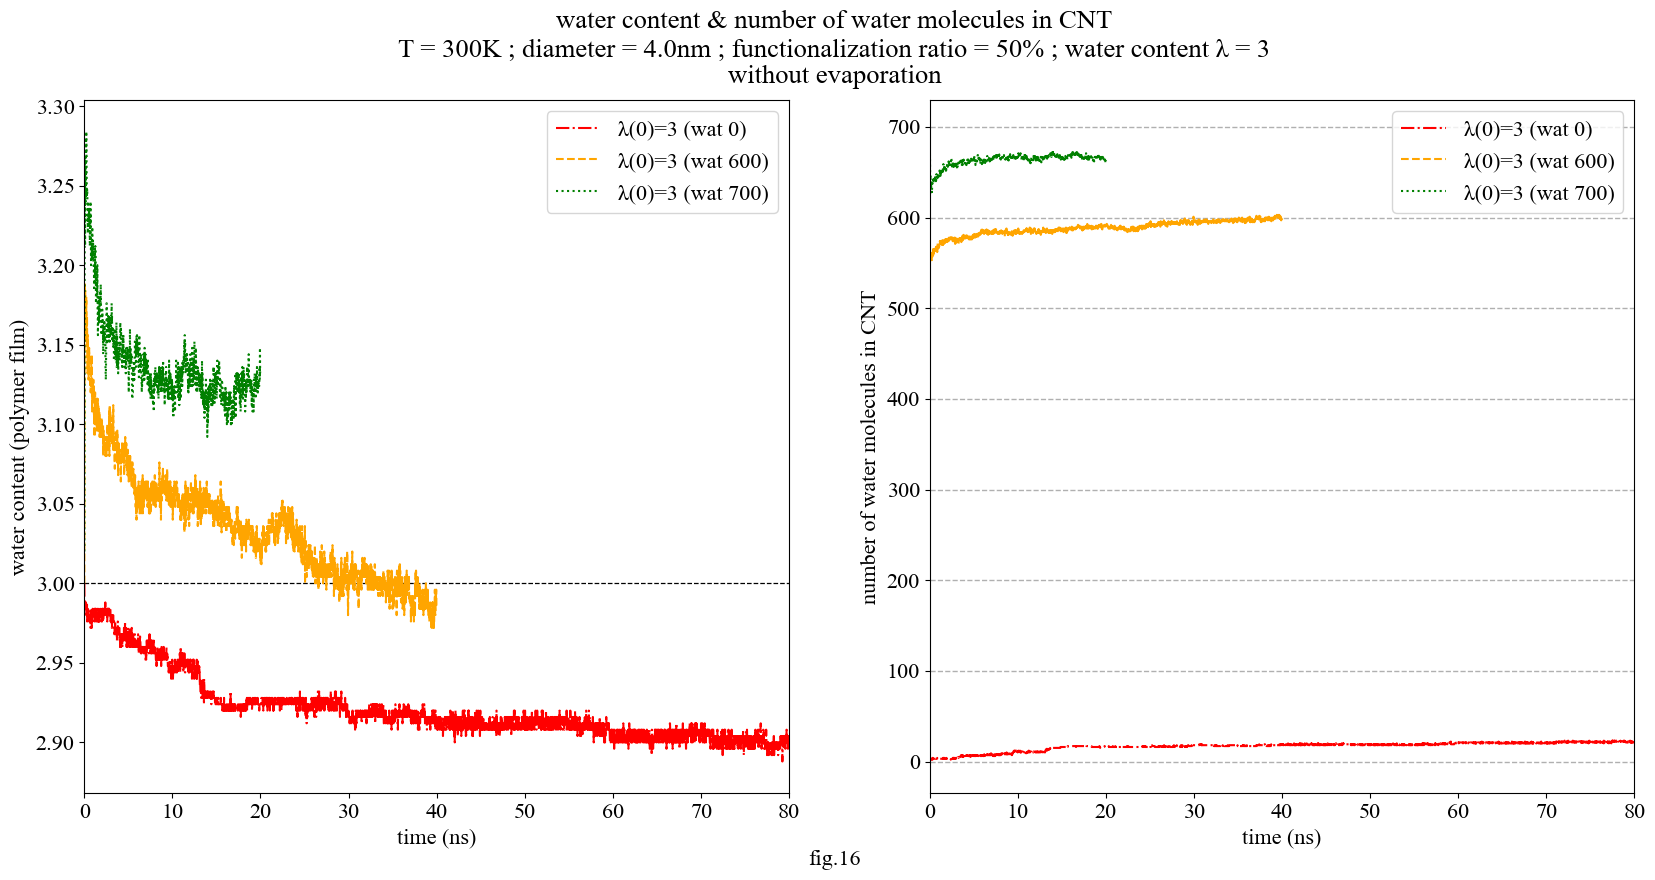

<< T=300; diameter=4.0nm, coh=50, λ = 7 >>
17


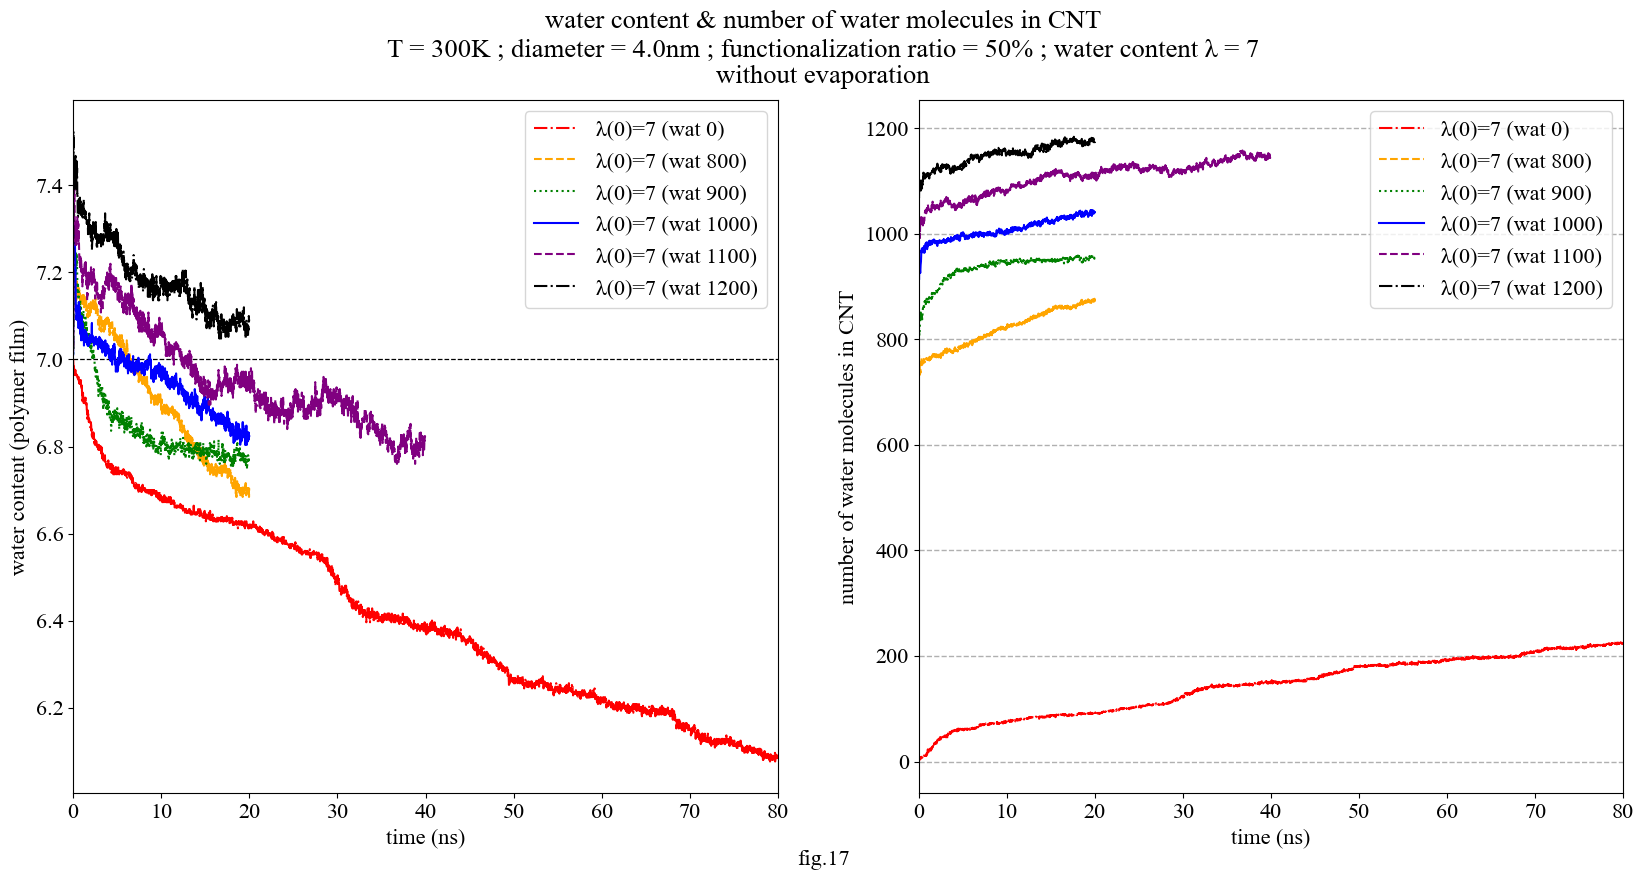

<< T=300; diameter=4.0nm, coh=50, λ = 11 >>
Key Error with df_Ow_nt30_coh25_nafl11_t300_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh25_nafl7_t300_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh25_nafl11_t300_wat0 [number (water molecules in CNT)]: Empty DataFrame
Key Error with df_Ow_nt30_coh25_nafl11_t300_wat1300 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh25_nafl7_t300_wat1300 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh25_nafl11_t300_wat1300 [number (water molecules in CNT)]: Empty DataFrame
Key Error with df_Ow_nt30_coh25_nafl11_t300_wat1400 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh25_nafl7_t300_wat1400 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh25_nafl11_t300_wat1400 [number (water molecules in CNT)]: Empty DataFrame
Key Error with df_Ow_nt30_coh25_nafl11_t300_wat1500 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh25_nafl7_t300_wat1500 [num

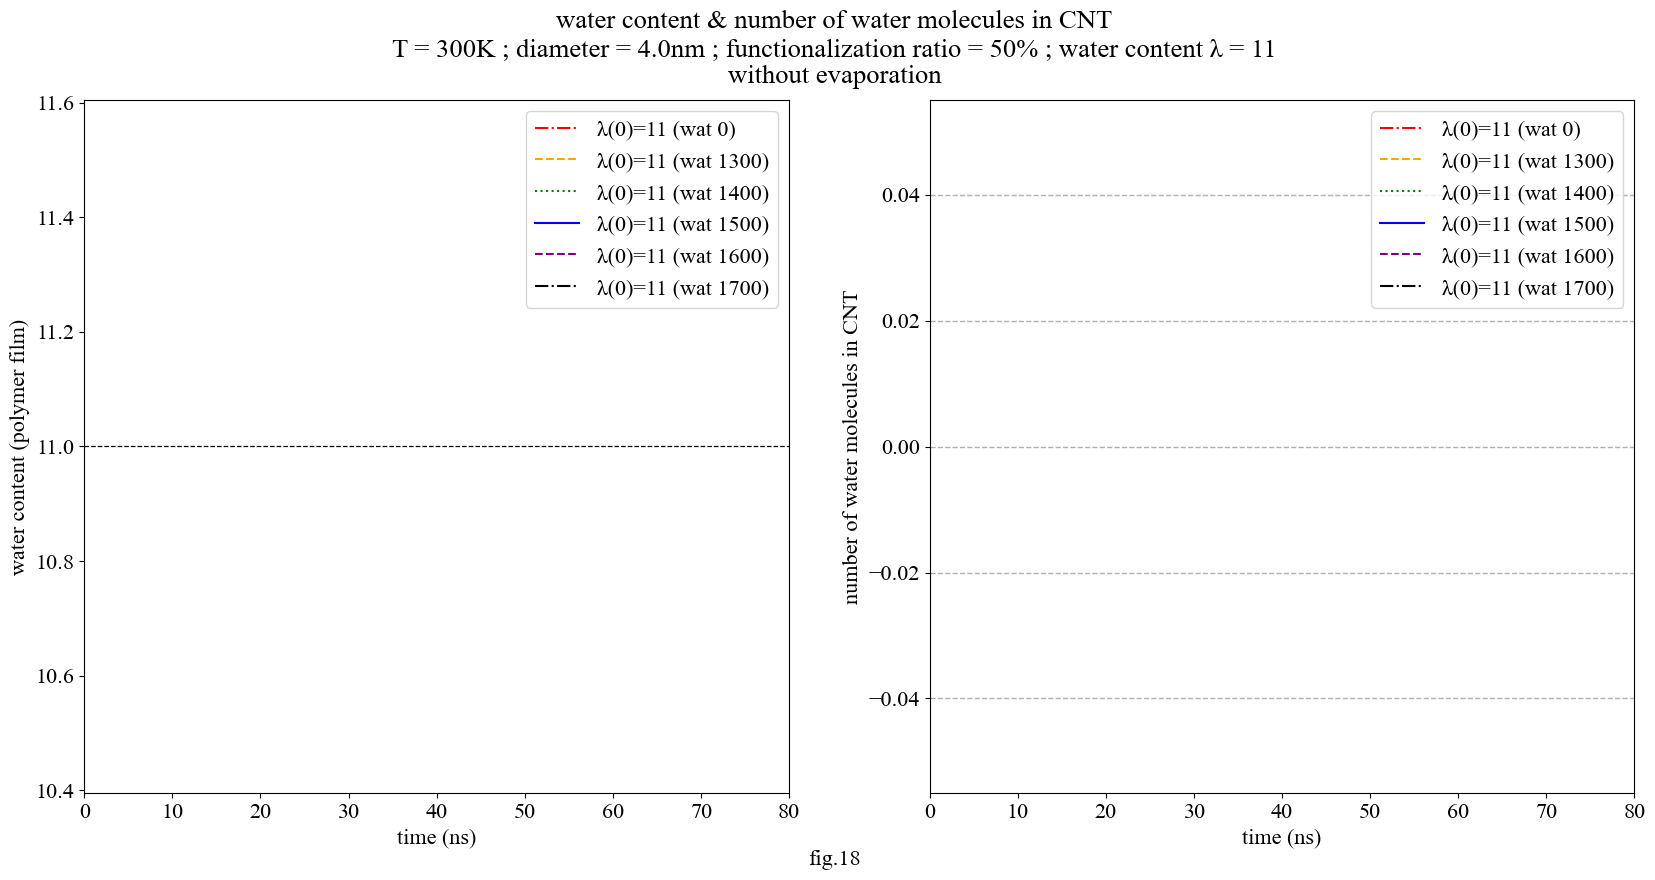

<< T=350; diameter=2.7nm, coh=30, λ = 3 >>
19


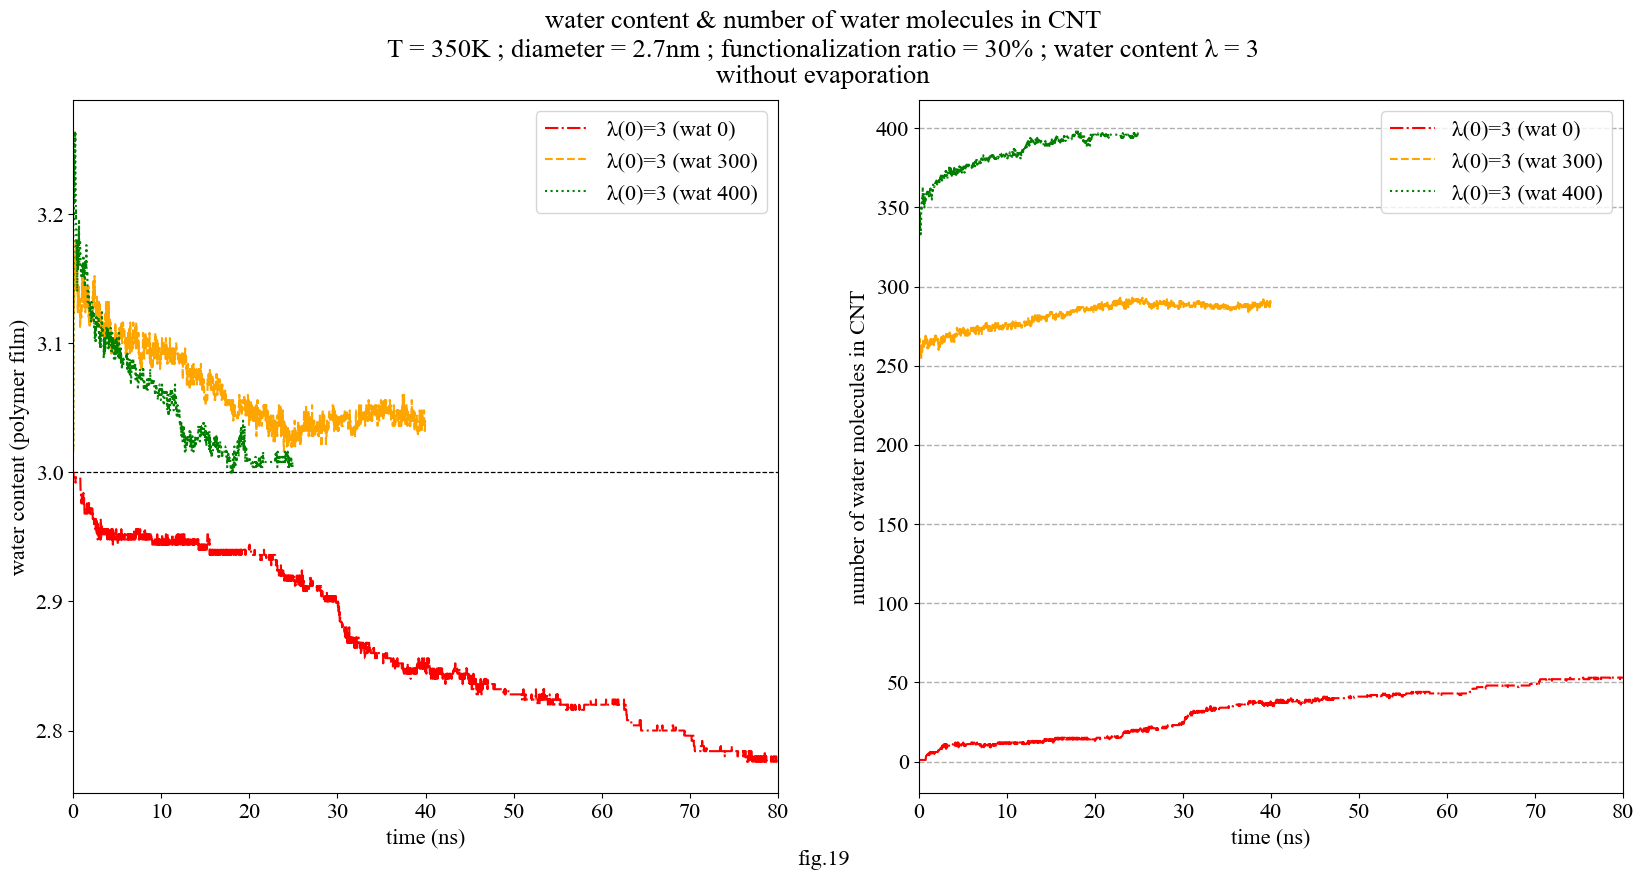

<< T=350; diameter=2.7nm, coh=30, λ = 7 >>
20


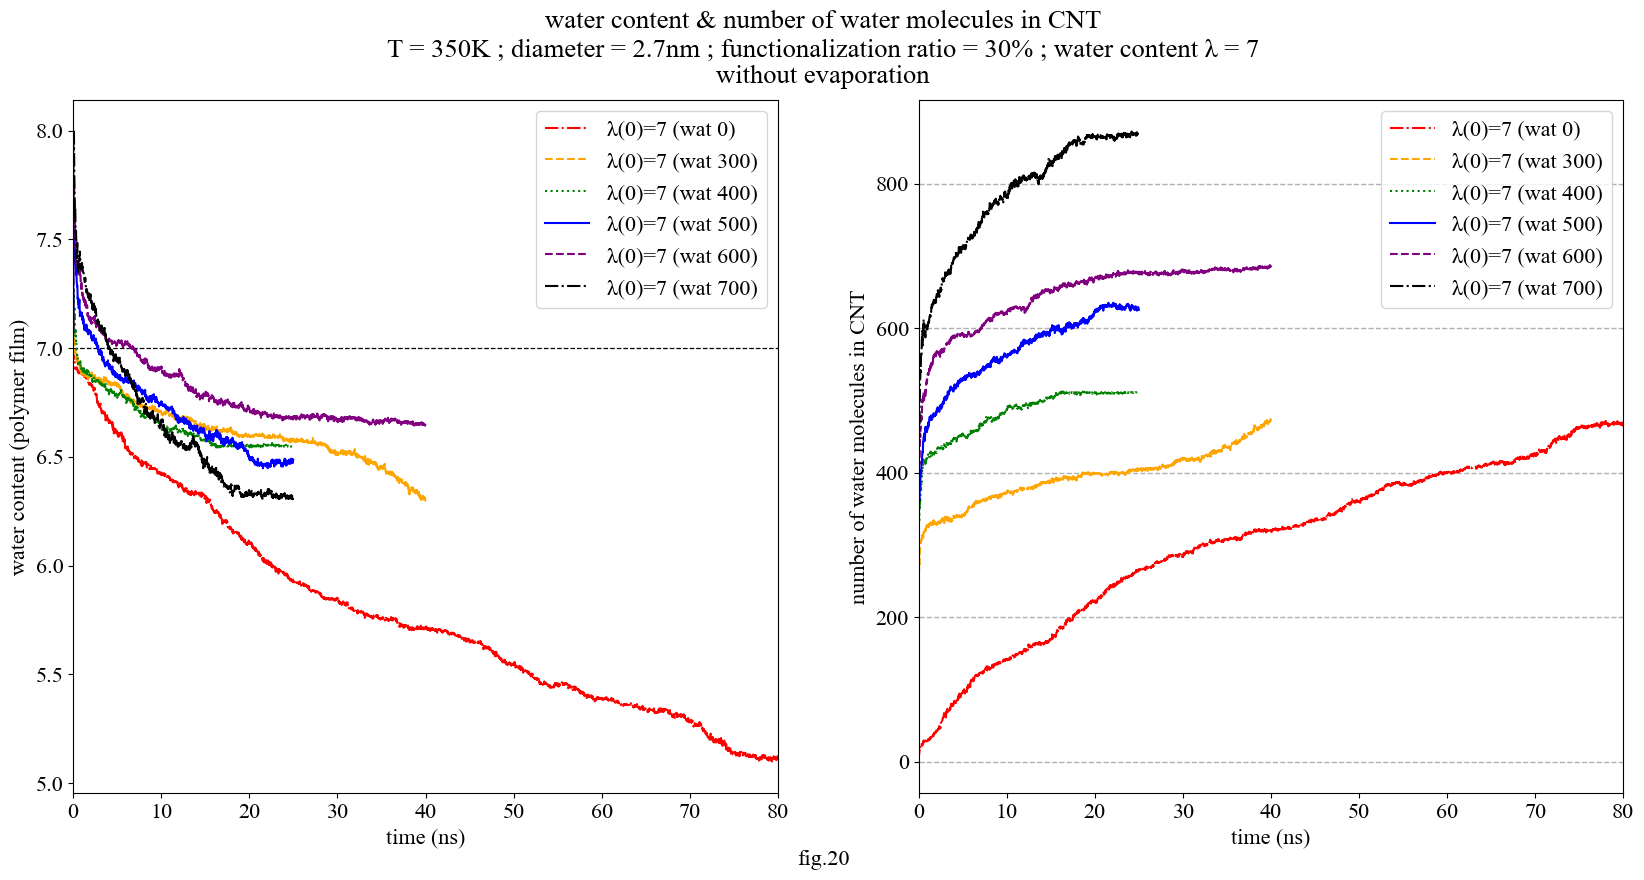

<< T=350; diameter=2.7nm, coh=30, λ = 11 >>
Key Error with df_Ow_nt20_coh15_nafl11_t350_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt20_coh15_nafl3_t350_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt20_coh15_nafl11_t350_wat0 [number (water molecules in CNT)]: Empty DataFrame
21


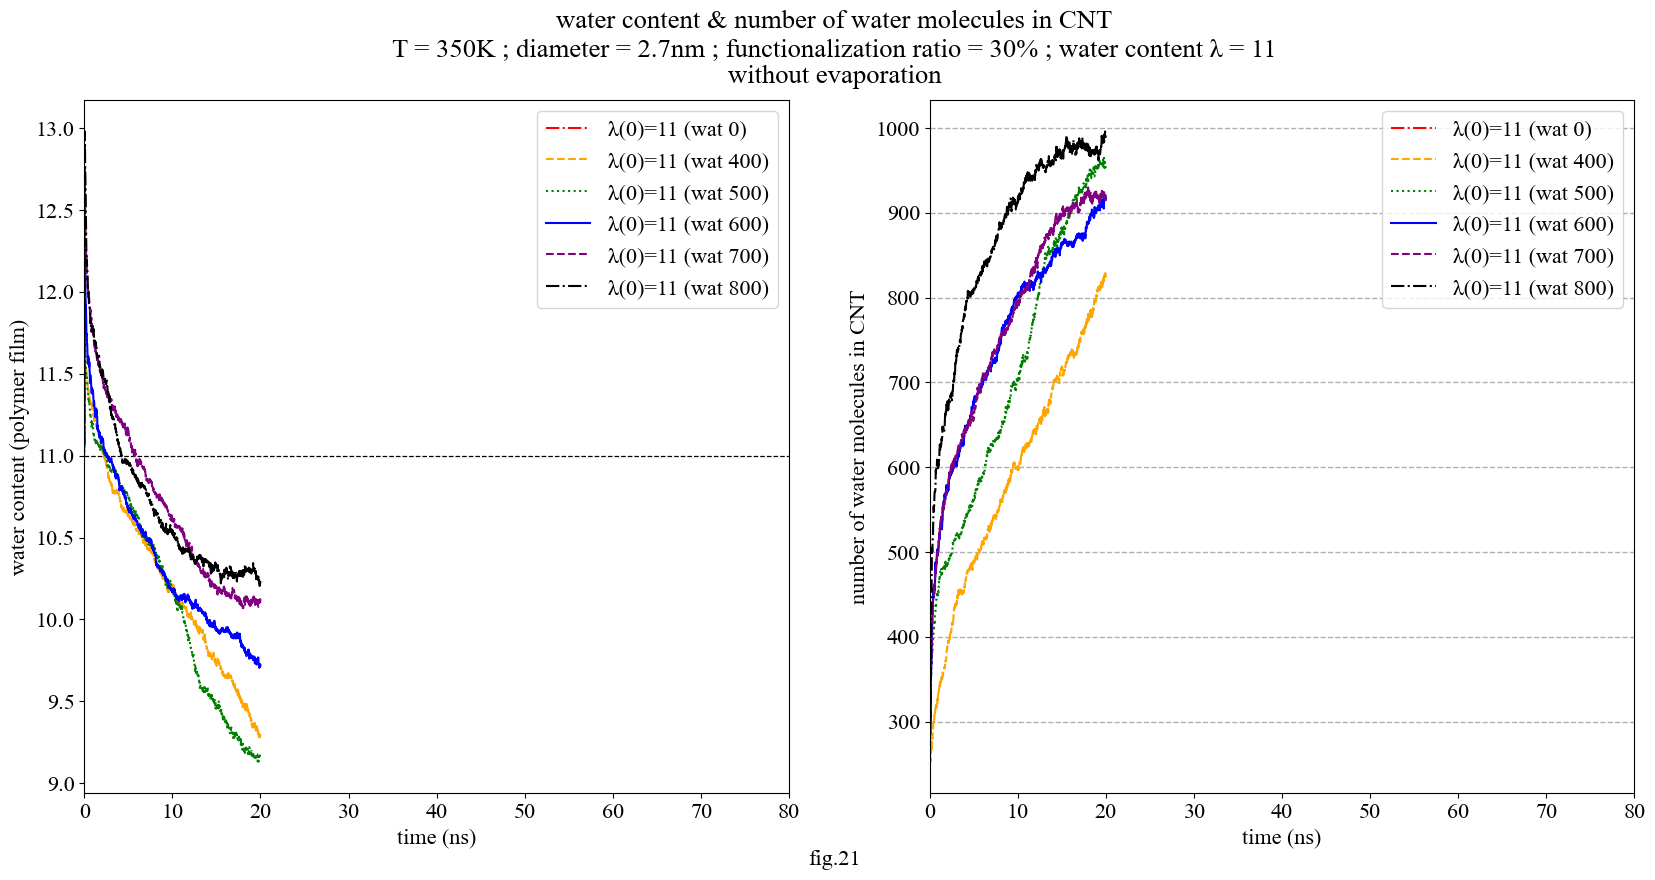

<< T=350; diameter=2.7nm, coh=40, λ = 3 >>
22


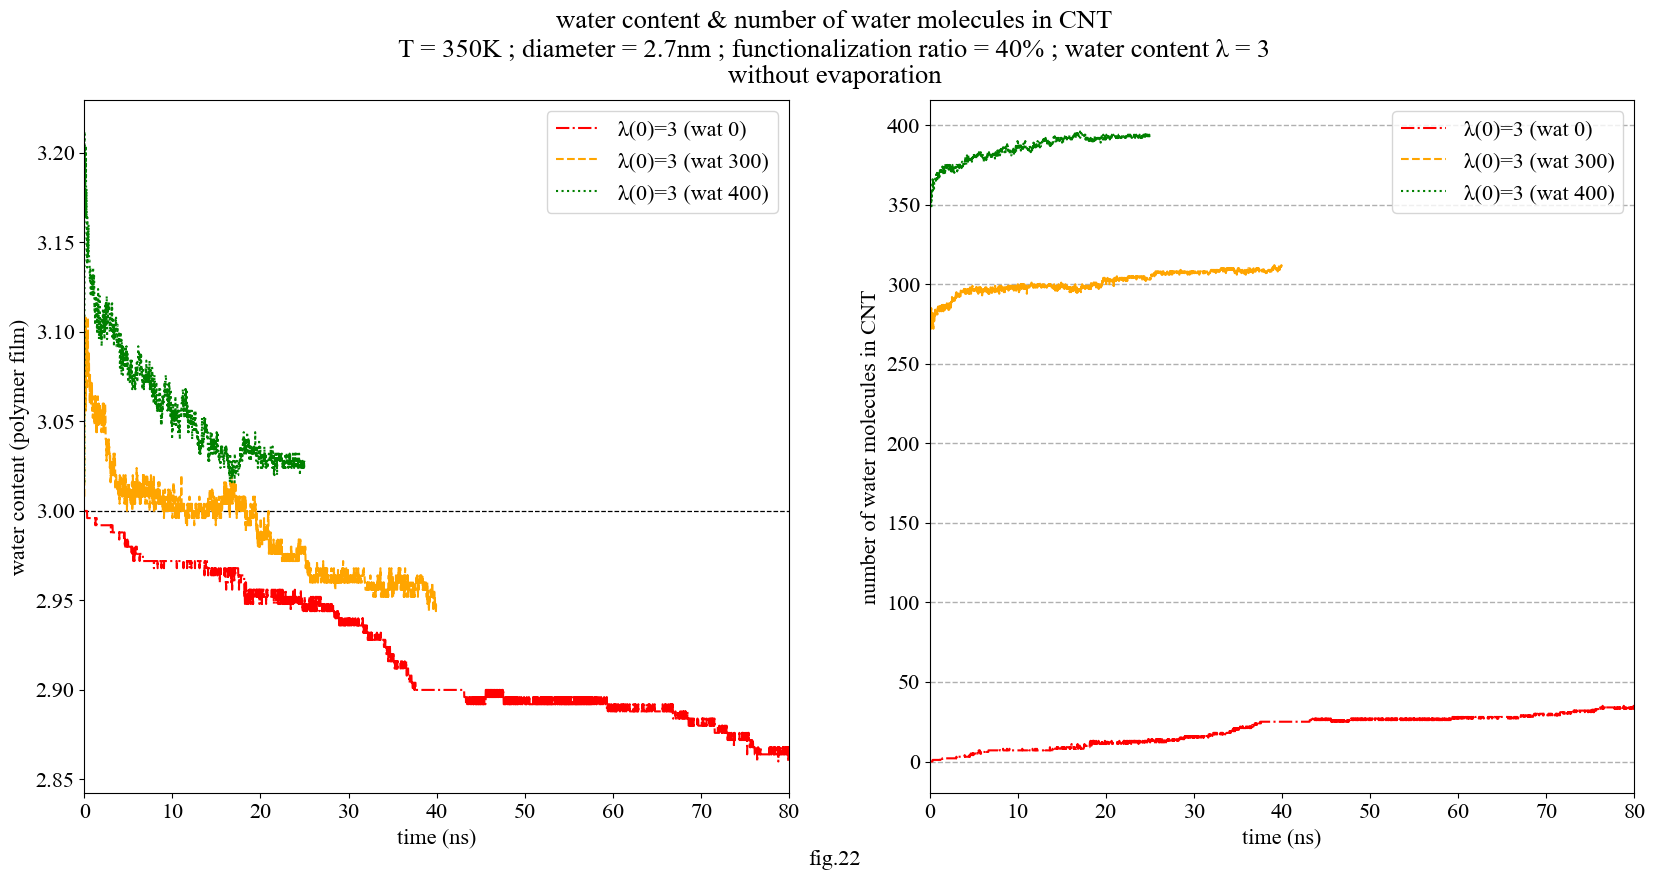

<< T=350; diameter=2.7nm, coh=40, λ = 7 >>
23


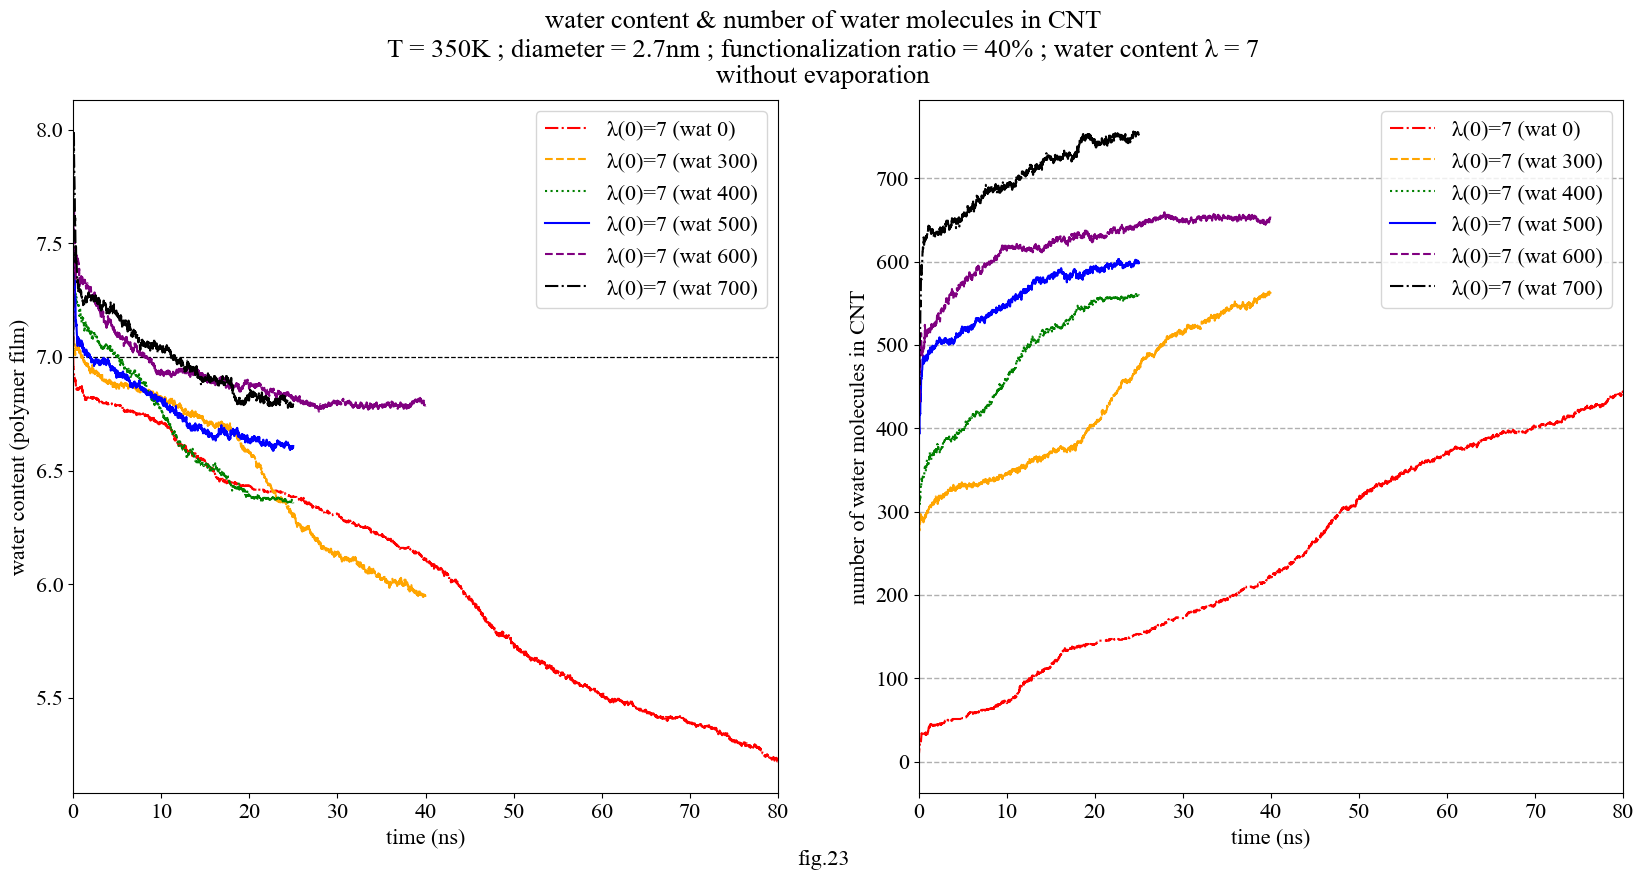

<< T=350; diameter=2.7nm, coh=40, λ = 11 >>
Key Error with df_Ow_nt20_coh20_nafl11_t350_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt20_coh20_nafl3_t350_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt20_coh20_nafl11_t350_wat0 [number (water molecules in CNT)]: Empty DataFrame
24


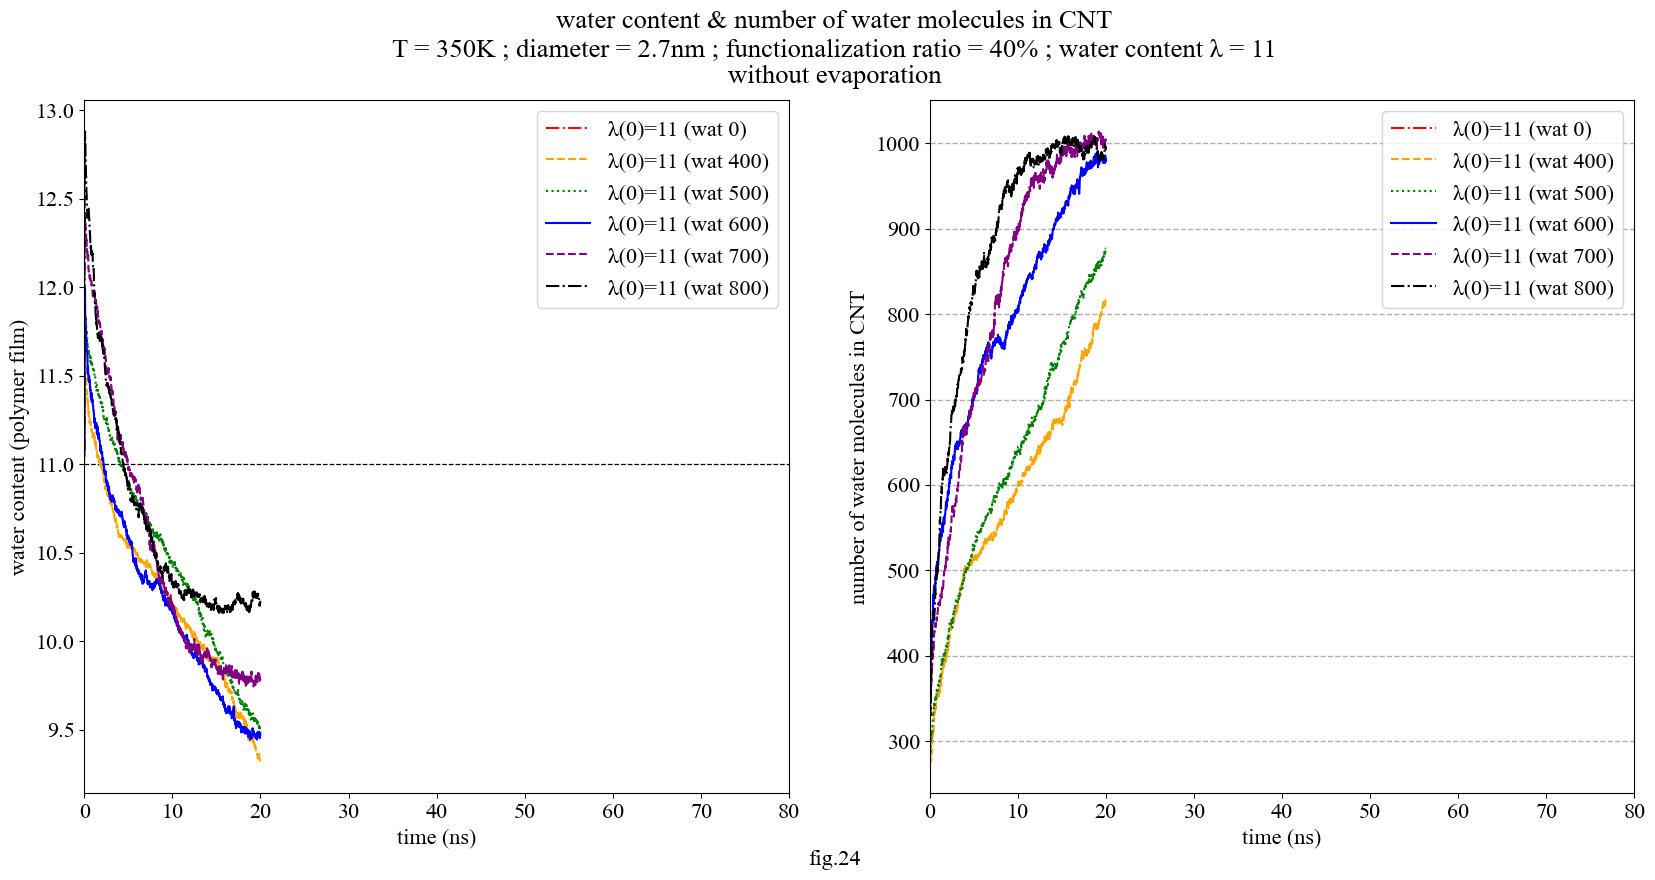

<< T=350; diameter=2.7nm, coh=50, λ = 3 >>
25


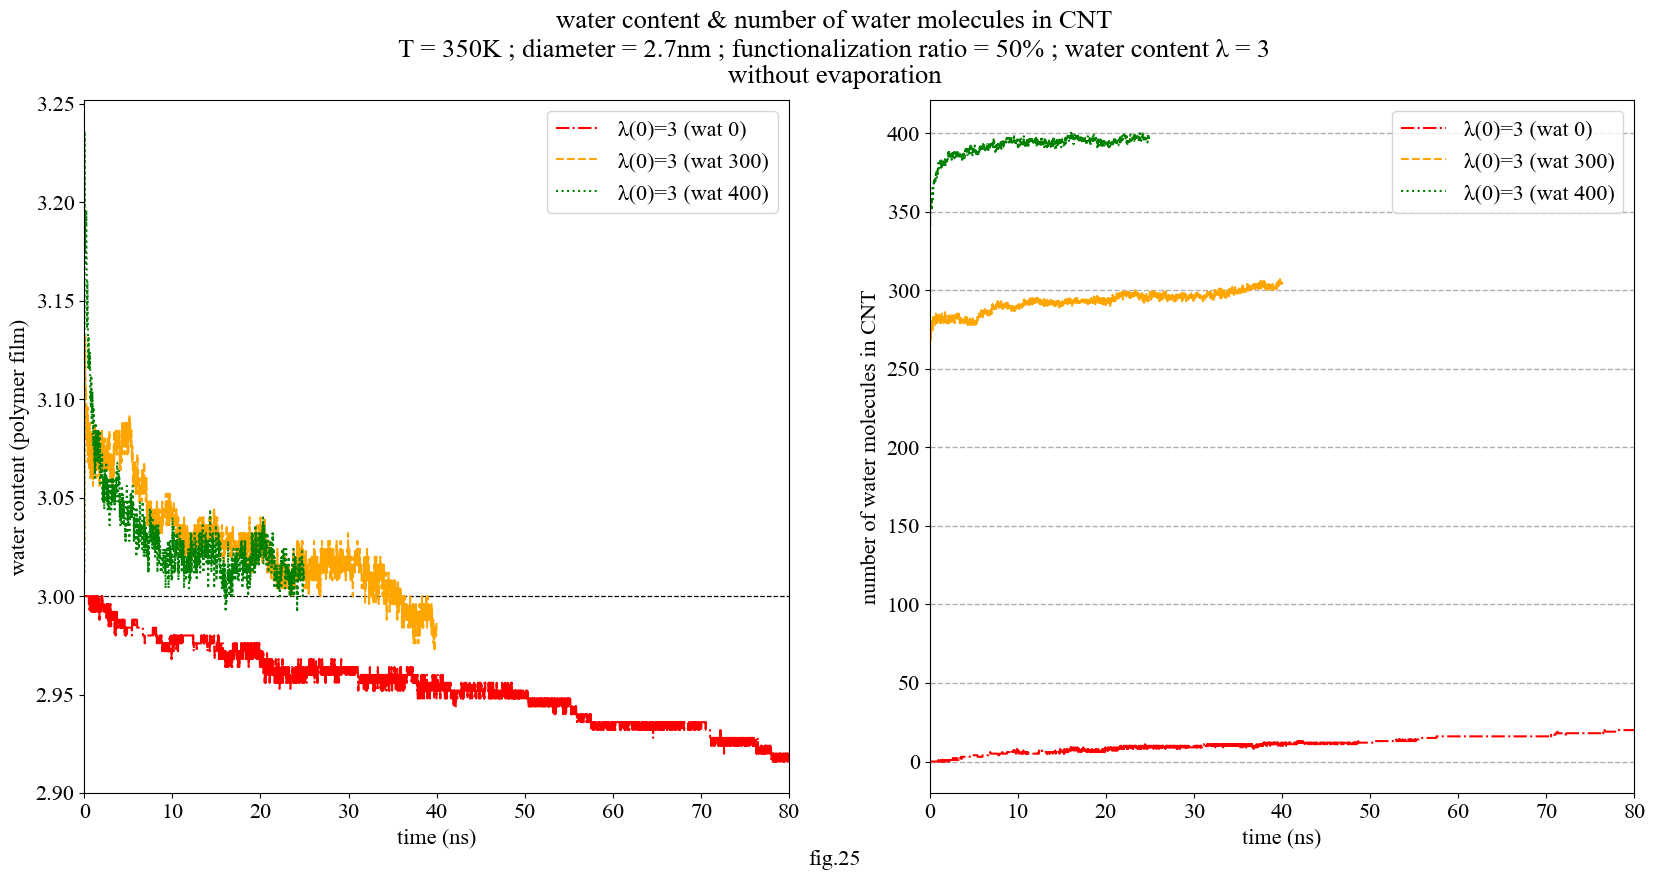

<< T=350; diameter=2.7nm, coh=50, λ = 7 >>
26


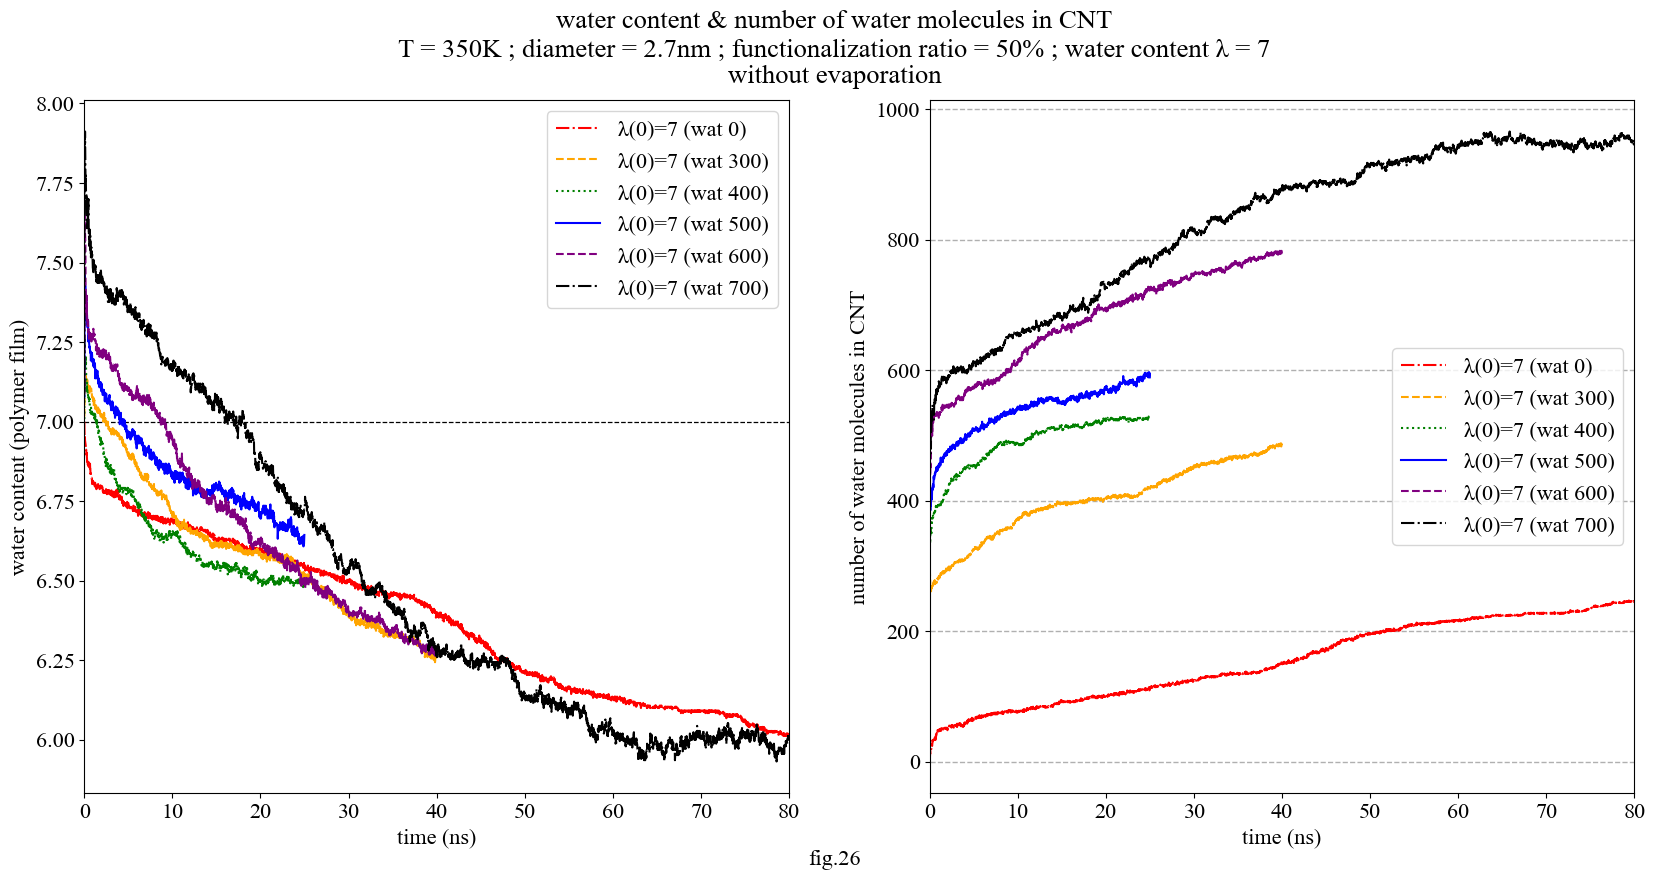

<< T=350; diameter=2.7nm, coh=50, λ = 11 >>
Key Error with df_Ow_nt20_coh25_nafl11_t350_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt20_coh25_nafl3_t350_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt20_coh25_nafl11_t350_wat0 [number (water molecules in CNT)]: Empty DataFrame
27


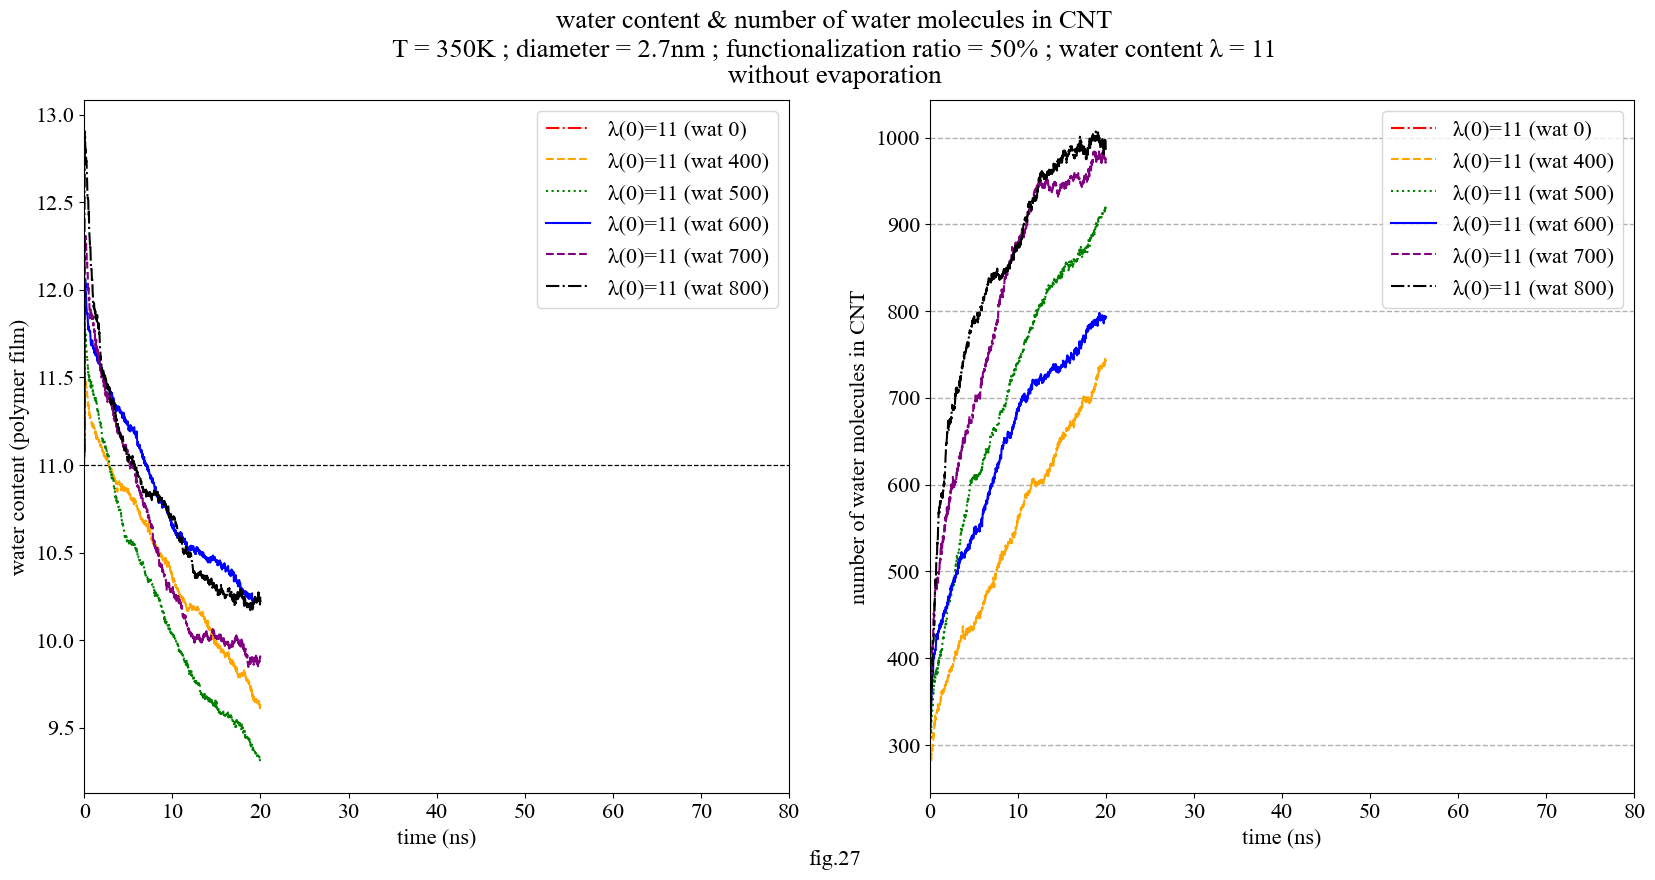

<< T=350; diameter=4.0nm, coh=30, λ = 3 >>
28


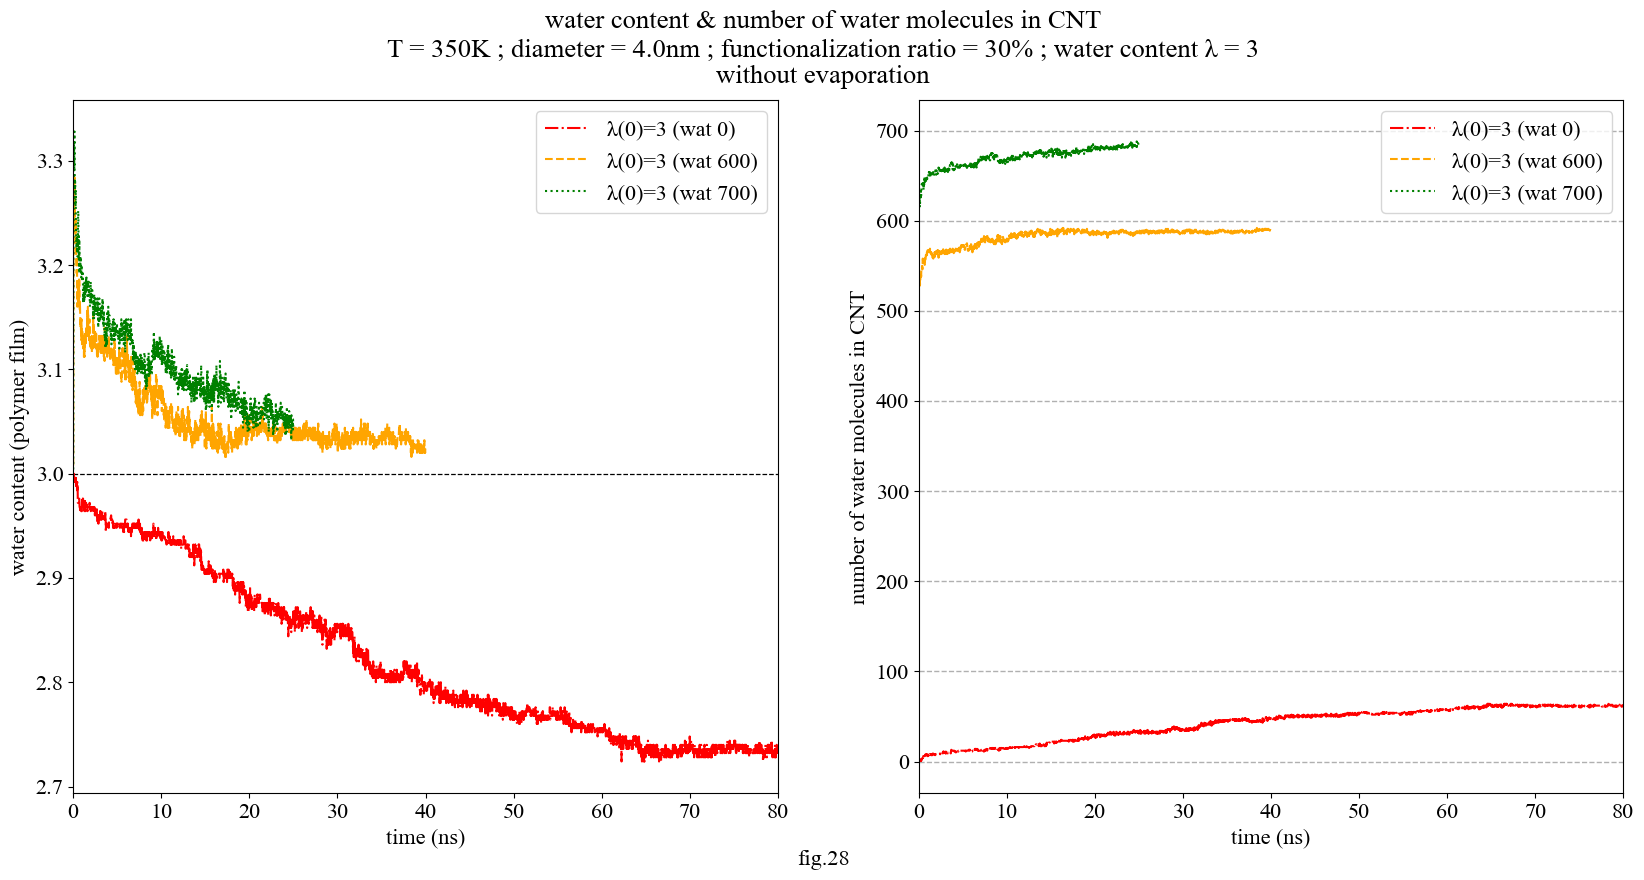

<< T=350; diameter=4.0nm, coh=30, λ = 7 >>
29


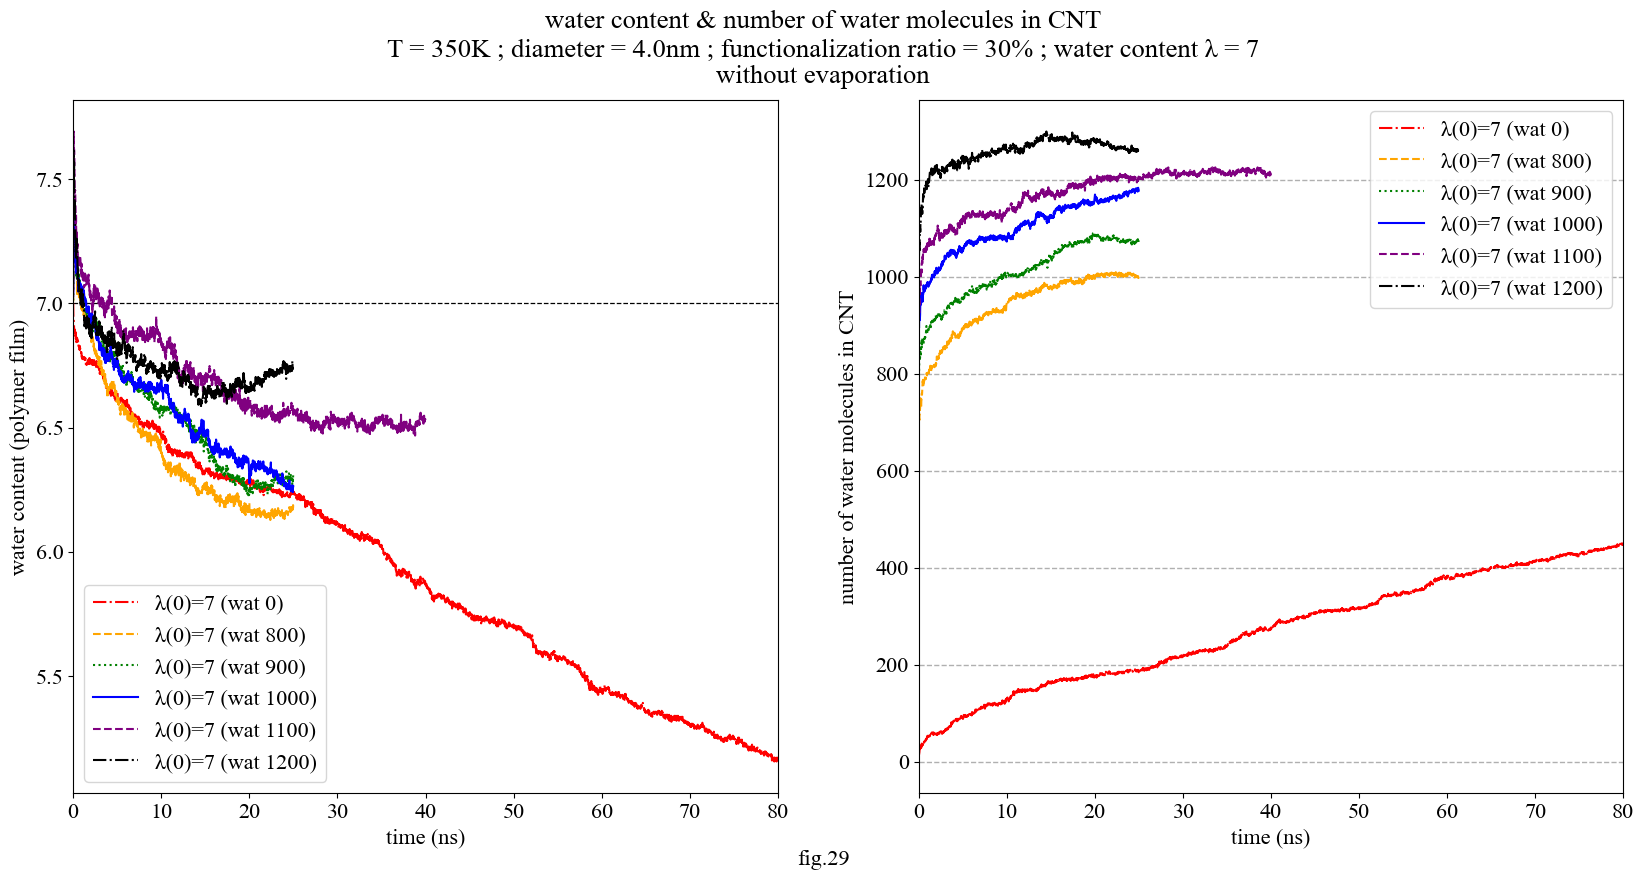

<< T=350; diameter=4.0nm, coh=30, λ = 11 >>
Key Error with df_Ow_nt30_coh15_nafl11_t350_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh15_nafl7_t350_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh15_nafl11_t350_wat0 [number (water molecules in CNT)]: Empty DataFrame
30


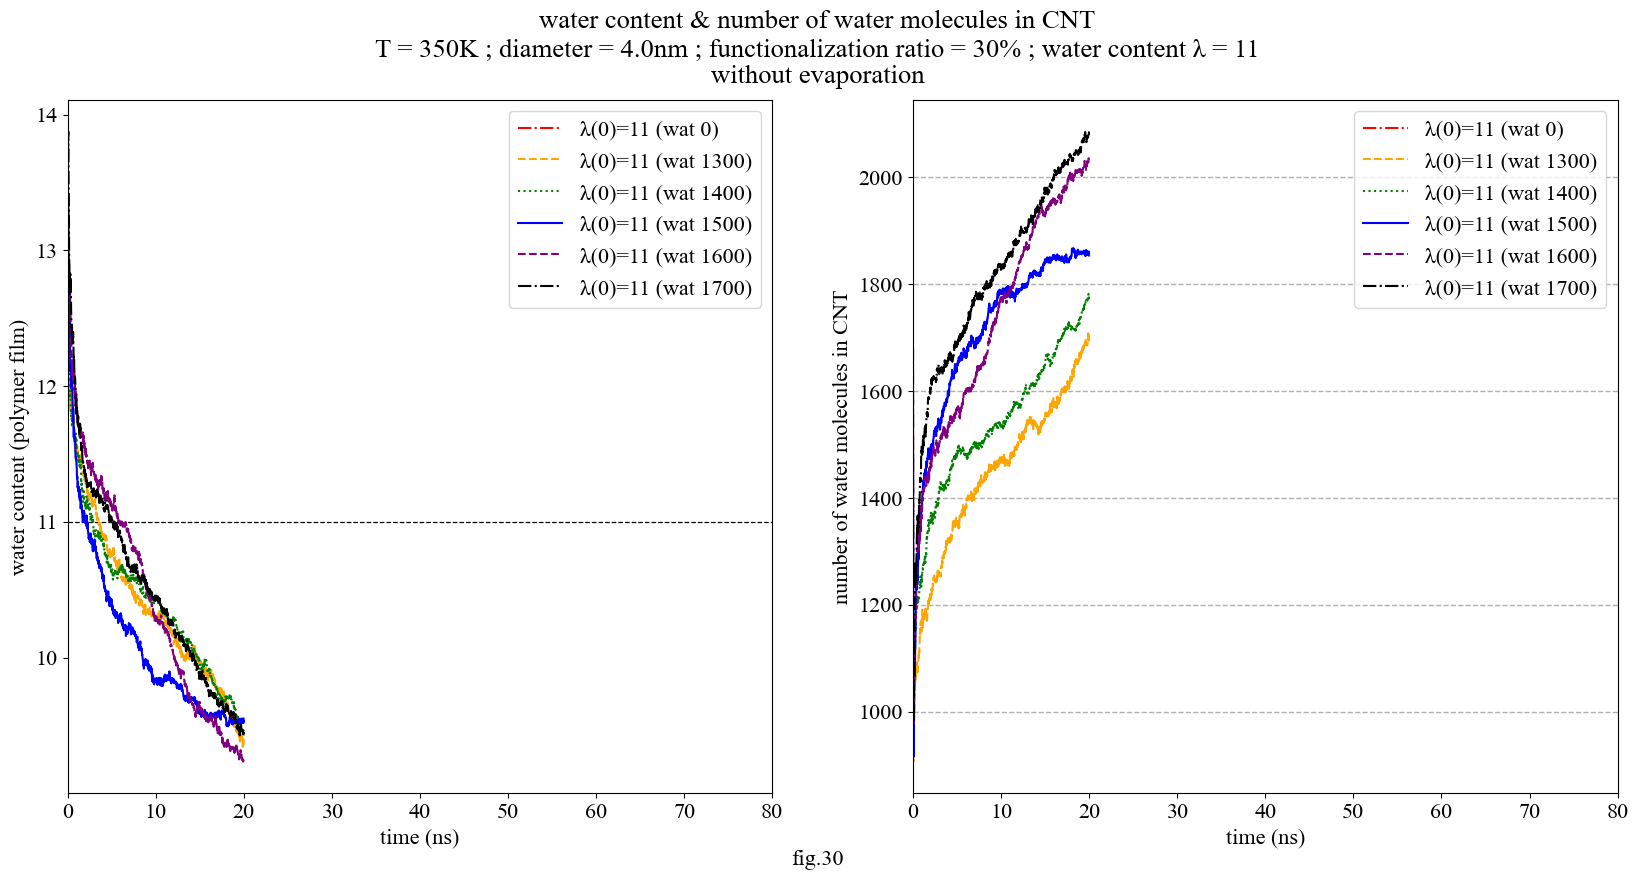

<< T=350; diameter=4.0nm, coh=40, λ = 3 >>
31


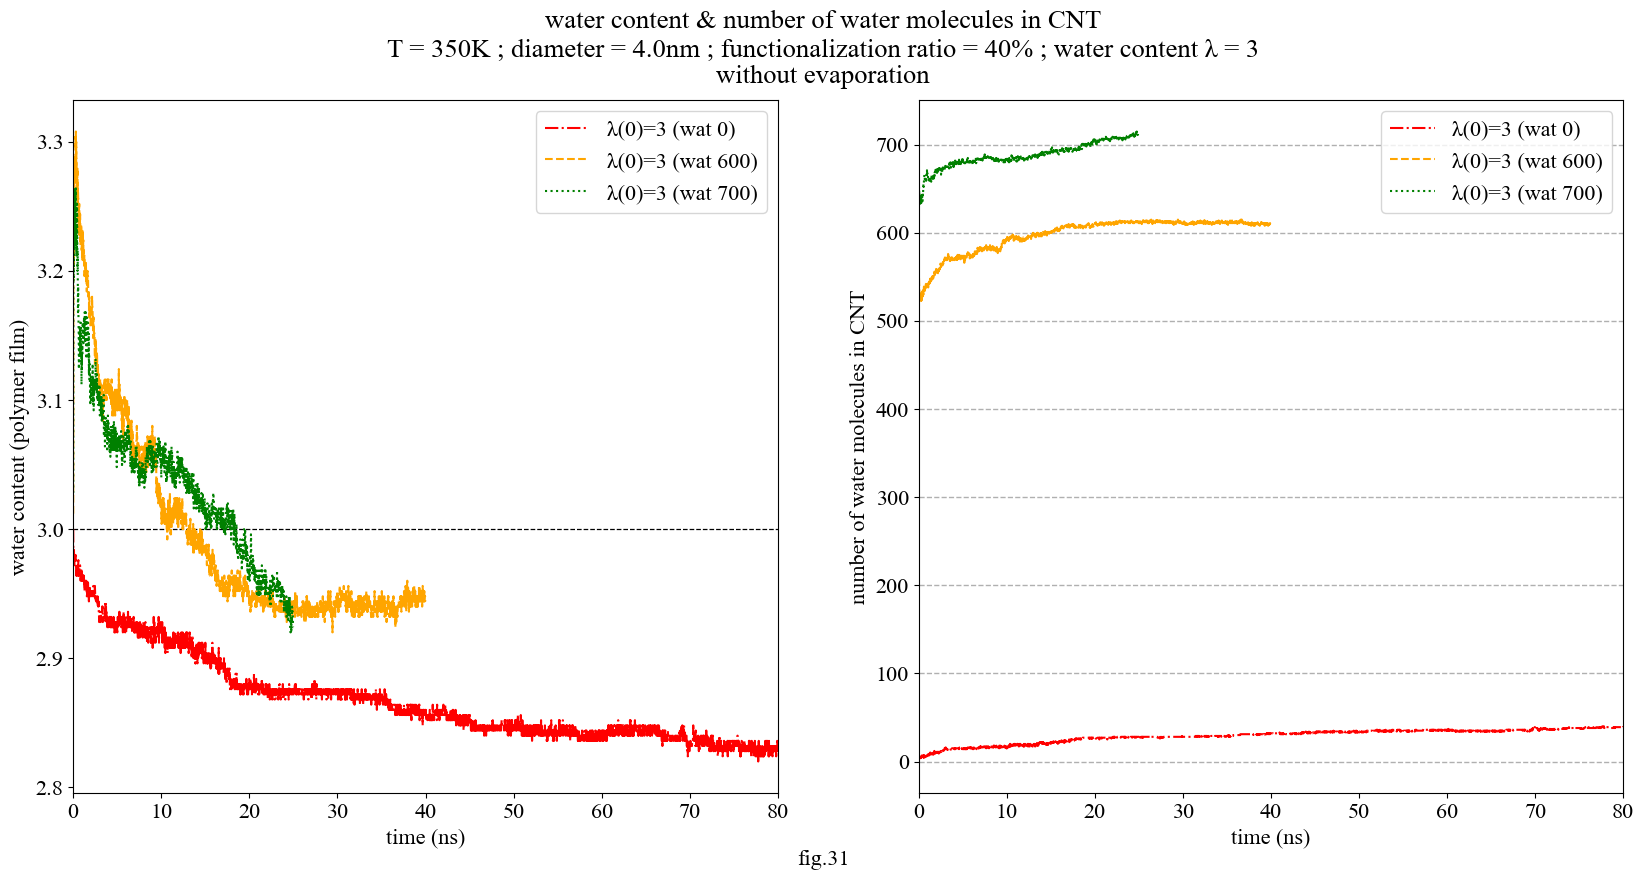

<< T=350; diameter=4.0nm, coh=40, λ = 7 >>
32


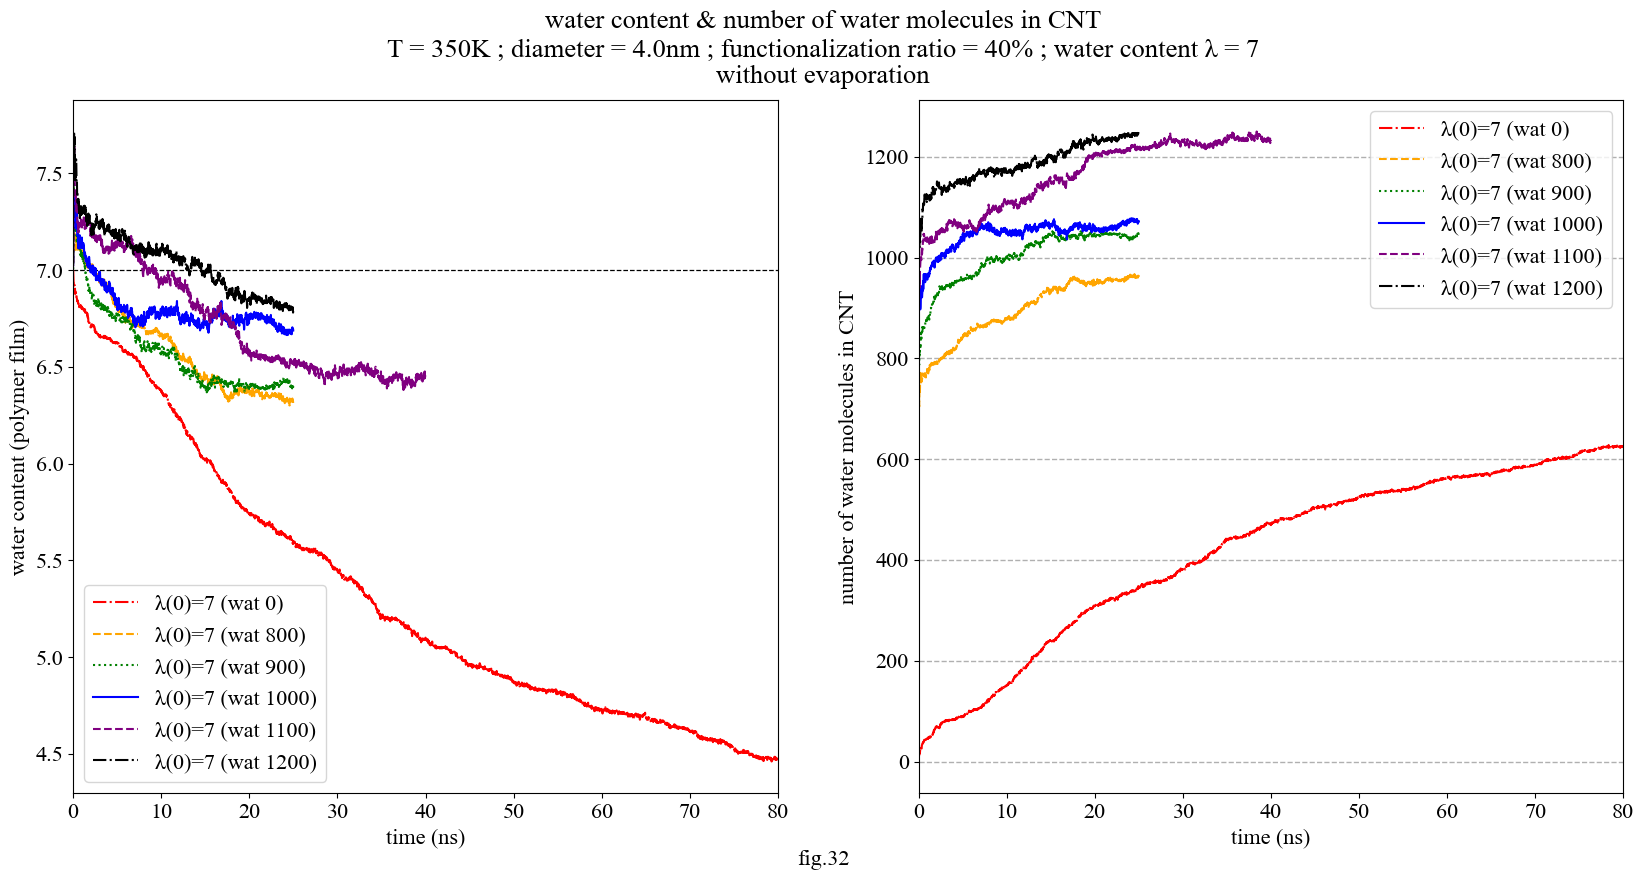

<< T=350; diameter=4.0nm, coh=40, λ = 11 >>
Key Error with df_Ow_nt30_coh20_nafl11_t350_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh20_nafl7_t350_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh20_nafl11_t350_wat0 [number (water molecules in CNT)]: Empty DataFrame
33


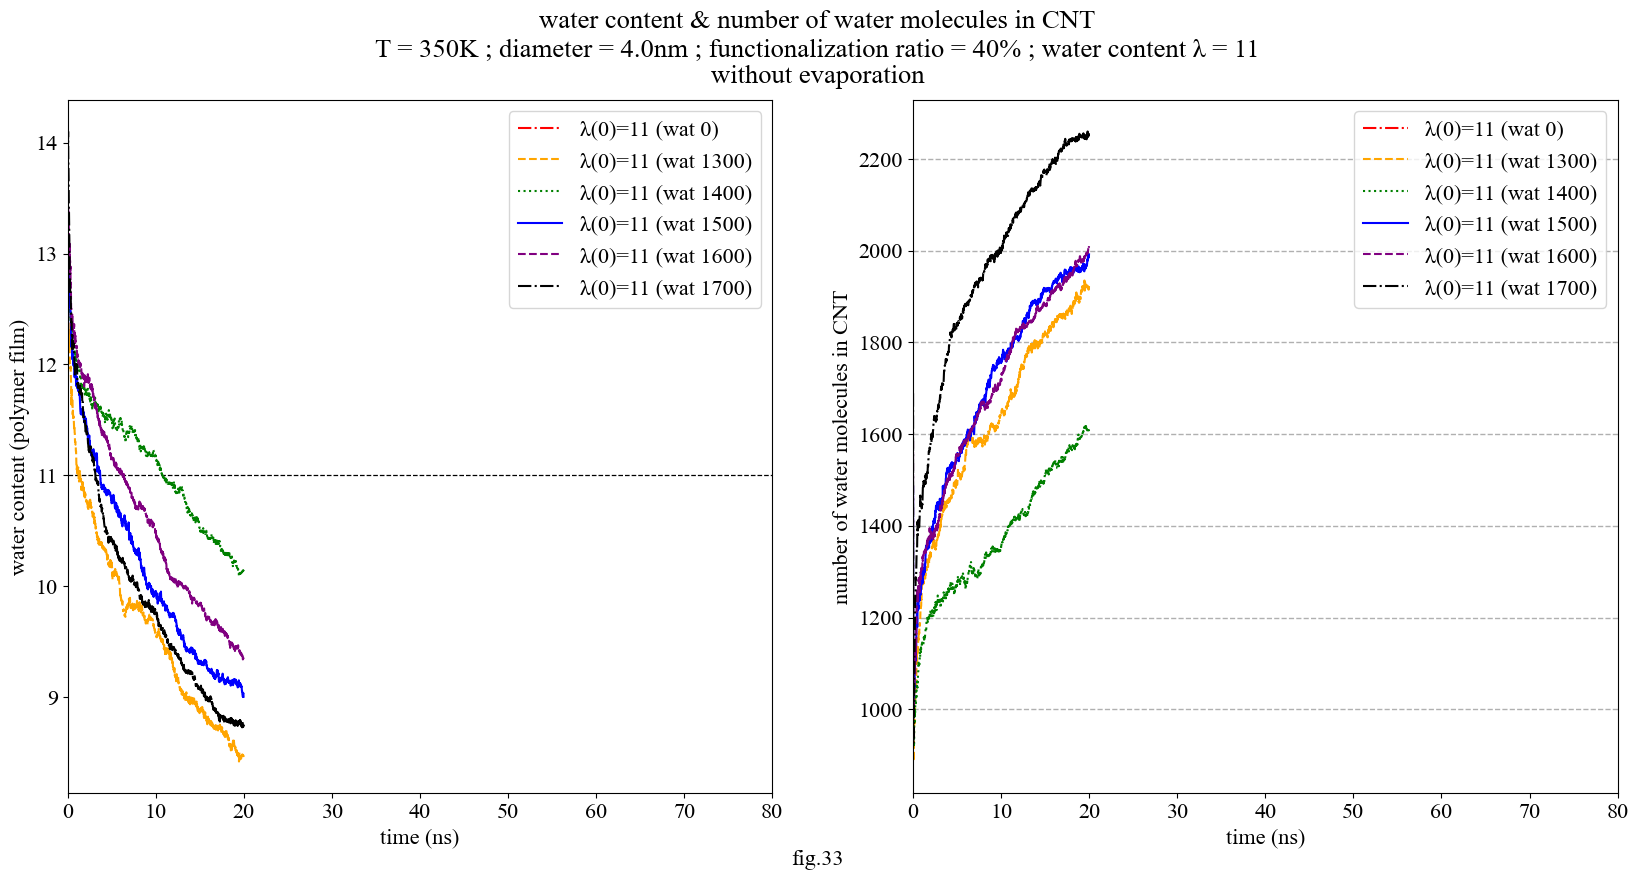

<< T=350; diameter=4.0nm, coh=50, λ = 3 >>
34


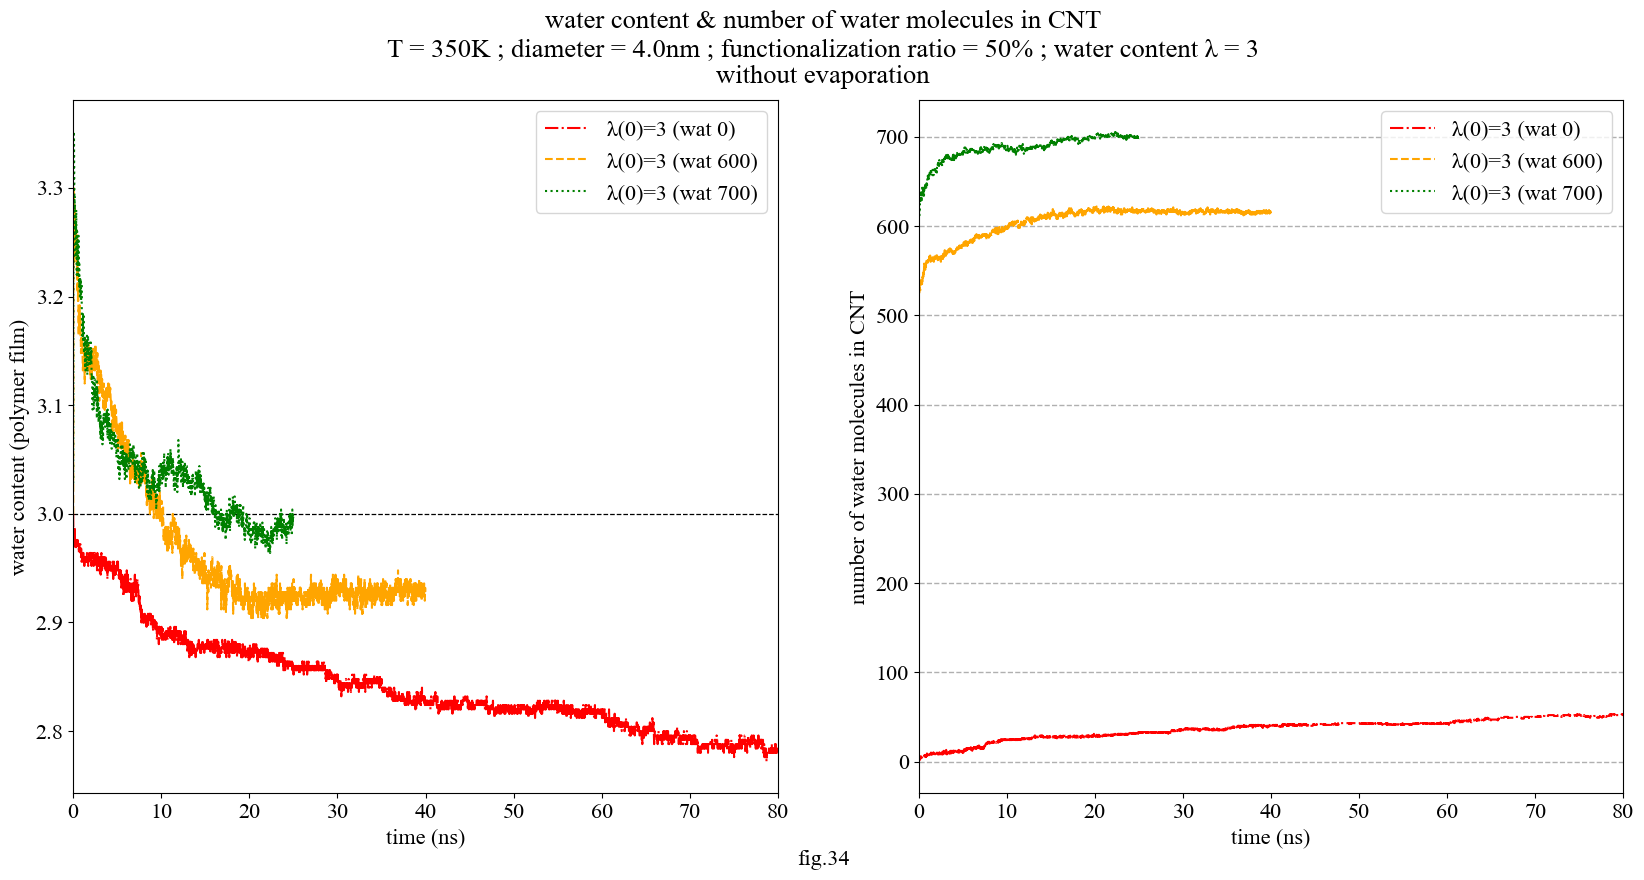

<< T=350; diameter=4.0nm, coh=50, λ = 7 >>
35


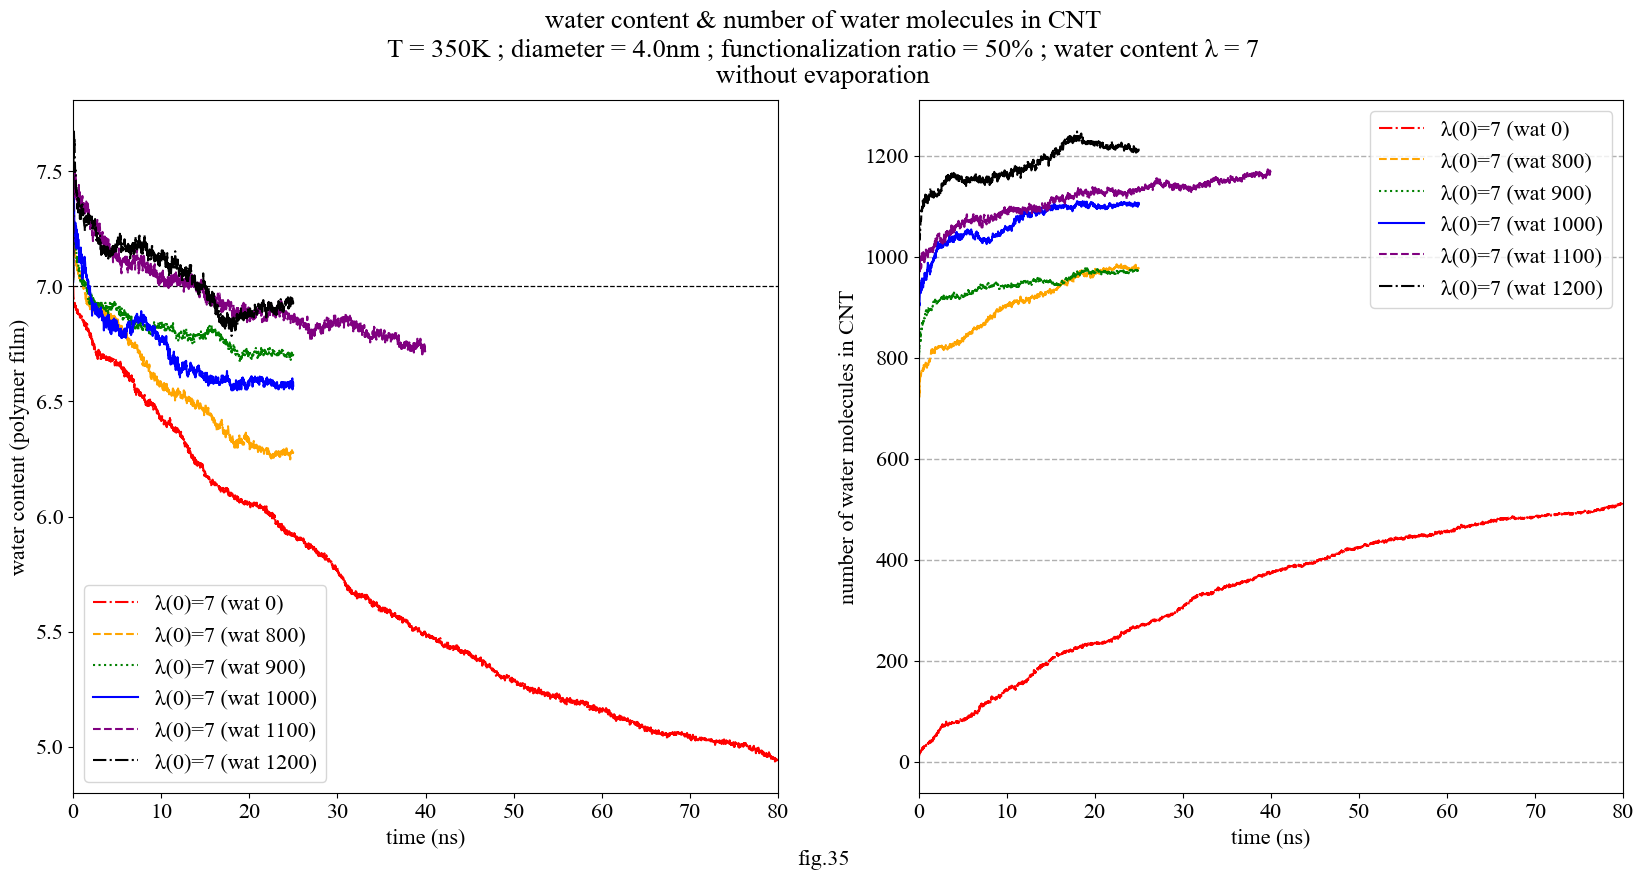

<< T=350; diameter=4.0nm, coh=50, λ = 11 >>
Key Error with df_Ow_nt30_coh25_nafl11_t350_wat0 [number (water molecules above)]: Empty DataFrame

df_Ow_nt30_coh25_nafl7_t350_wat0 [number (oxonium ions above)]: Empty DataFrame
df_Ow_nt30_coh25_nafl11_t350_wat0 [number (water molecules in CNT)]: Empty DataFrame
36


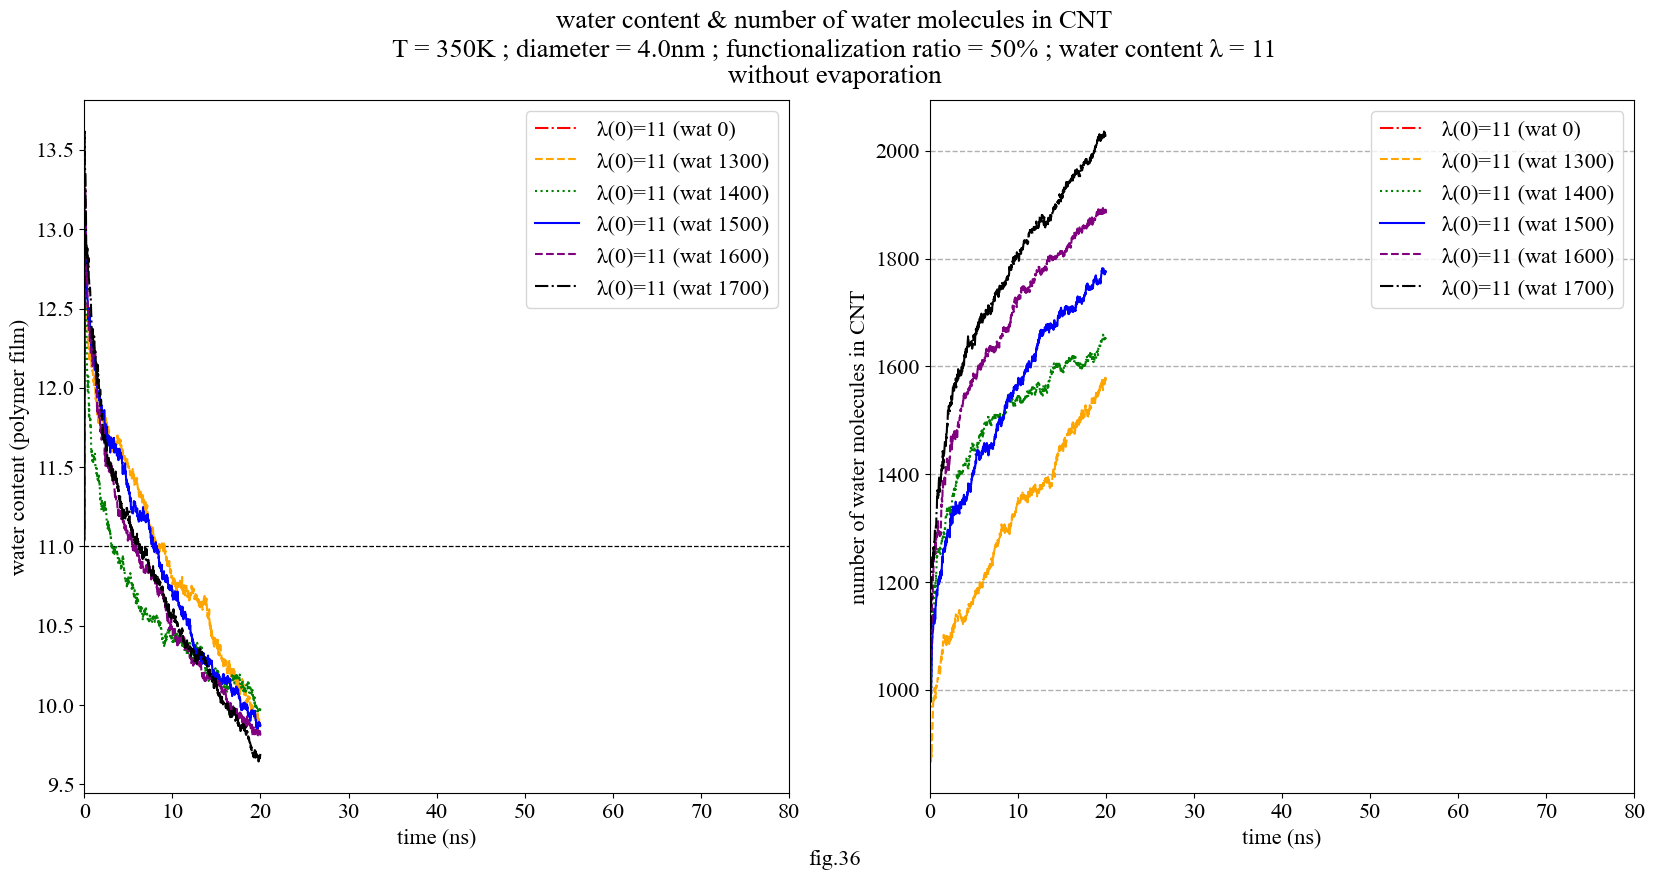

In [4]:

def wc_and_num_all():
    count = 1
    for t in range(len(temps)):
        for n in range(len(nts)):
            for c in range(len(cohs)): 
                for naf in range(len(nafls)):

                    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,9))
                    fig.suptitle(f"water content & number of water molecules in CNT\nT = {temps[t]}K ; diameter = {Diameter[n]} ; functionalization ratio = {cohs[c]*2}% ; water content λ = {nafls[naf]}\nwithout evaporation\n\n")
                    fig.text(0.5, 0.03, f'fig.{count}', ha='center')
                    print(f"<< T={temps[t]}; diameter={Diameter[n]}, coh={cohs[c]*2}, λ = {nafls[naf]} >>")
                    
                    match nafls[naf]:
                        case 3:
                            fig.axes[0].axhline(y = 3,  color = 'Black', linestyle = '--', linewidth = 0.9)
                        case 7:
                            fig.axes[0].axhline(y = 7,  color = 'Black', linestyle = '--', linewidth = 0.9)
                        case 11:
                            fig.axes[0].axhline(y = 11, color = 'Black', linestyle = '--', linewidth = 0.9)

                    Y = [ [] for _ in range(2) ]  
                    
                    match (naf, n):
                        case (0, 0):
                            wats = wats03_nt20 
                        case (1, 0):
                            wats = wats07_nt20 
                        case (2, 0):
                            wats = wats11_nt20 
                        case (0, 1):
                            wats = wats03_nt30
                        case (1, 1):
                            wats = wats07_nt30
                        case (2, 1):
                            wats = wats11_nt30
                    


                    for w in range(len(wats)):
                
                        try:
                            num_Ow_above_tube = dicts_list[0][f"df_Ow_nt{nts[n]}_coh{cohs[c]}_nafl{nafls[naf]}_t{temps[t]}_wat{wats[w]}"]['number (water molecules)']
                            if num_Ow_above_tube.empty:
                                print(f"Key Error with df_Ow_nt{nts[n]}_coh{cohs[c]}_nafl{nafls[naf]}_t{temps[t]}_wat{wats[w]} [number (water molecules above)]: Empty DataFrame\n")
                                # continue
                        except KeyError:
                                continue
###########################################
                        try: 
                            num_Oh_above_tube = dicts_list[1][f"df_Ow_nt{nts[n]}_coh{cohs[c]}_nafl{nafls[naf]}_t{temps[t]}_wat{wats[w]}"]['number (oxonium ions)']
                            if num_Oh_above_tube.empty:
                                print(f"df_Ow_nt{nts[n]}_coh{cohs[c]}_nafl{nafls[n]}_t{temps[t]}_wat{wats[w]} [number (oxonium ions above)]: Empty DataFrame")
                                # continue
                        except KeyError:
                                continue

########################################
                        try:
                            num_Ow_in_tube =    dicts_list[2][f"df_Ow_nt{nts[n]}_coh{cohs[c]}_nafl{nafls[naf]}_t{temps[t]}_wat{wats[w]}"]['number (water molecules)']
                            if num_Ow_in_tube.empty:
                                print(f"df_Ow_nt{nts[n]}_coh{cohs[c]}_nafl{nafls[naf]}_t{temps[t]}_wat{wats[w]} [number (water molecules in CNT)]: Empty DataFrame")
                                # continue
                        except KeyError:
                                continue
                                #  continue
##########################################

                        Y[0].append( (num_Ow_above_tube + num_Oh_above_tube) / 250 )
                        Y[1].append( num_Ow_in_tube )

                    for w in range(len(wats)):
                        try:
                            # X_sampled = X[::sample_rate]
                            Y_sampled = Y[0][w][::sample_rate]
                            X = Y[0][w].index / 1000
                            X_sampled = X[::sample_rate]
                            axes[0].plot(X_sampled, Y_sampled, color=colors[w], linestyle=line_styles[w],label=f"λ(0)={nafls[naf]} (wat {wats[w]})")
                        except IndexError:
                            paolo=f"\"{grandparent_dir}/COHCH_gra_t{temps[t]}/nt{nts[n]}-coh{cohs[c]}-nafl{nafls[naf]}-t{temps[t]}-wat{wats[w]}\""
                            scp  =f"\"/work/B/NIa/NIa078/COHCH_gra_t{temps[t]}/nt{nts[n]}-coh{cohs[c]}-nafl{nafls[naf]}-t{temps[t]}-wat{wats[w]}/output_analysis\""
                            print(f"Index error with {paolo}")
                            print(f"Index error with {scp}")
                            
                            print(f"scp -r {scp} jihun@paolo000:{paolo}")
                            print("")
                            continue

                        try:
                            X_sampled = X[::sample_rate]
                            Y_sampled = Y[1][w][::sample_rate]
                            X = Y[1][w].index / 1000
                            X_sampled = X[::sample_rate]
                            axes[1].plot(X_sampled, Y_sampled, color=colors[w], linestyle=line_styles[w],label=f"λ(0)={nafls[naf]} (wat {wats[w]})")
                        except IndexError:
                            paolo=f"\"{grandparent_dir}/COHCH_gra_t{temps[t]}_EVAPOR/nt{nts[n]}-coh{cohs[c]}-nafl{nafls[naf]}-t{temps[t]}-wat{wats[w]}\""
                            scp  =f"\"/work/B/NIa/NIa078/COHCH_gra_t{temps[t]}_EVAPOR/nt{nts[n]}-coh{cohs[c]}-nafl{nafls[naf]}-t{temps[t]}-wat{wats[w]}/output_analysis\""
                            print(f"Index error with {paolo}")
                            print(f"Index error with {scp}")
                            
                            print(f"scp -r {scp} jihun@paolo000:{paolo}")
                            print("")
                            continue
##############################################################################                        
                    fig.axes[0].set_xlim((0,80))
                    fig.axes[0].legend()
                    fig.axes[0].set_xlabel('time (ns)')
                    fig.axes[0].set_ylabel('water content (polymer film)')

                    fig.axes[1].set_xlim((0,80))
                    fig.axes[1].legend()
                    fig.axes[1].set_xlabel('time (ns)')
                    fig.axes[1].set_ylabel('number of water molecules in CNT')
                    fig.axes[1].grid(axis='y',linestyle='dashed', linewidth=1)        
                    

                    plt.rcParams["font.family"] = "serif"
                    plt.rcParams["font.serif"] = ["Times New Roman"]
                    
                    matplotlib.rcParams.update({'font.size': 16})

                    print(count)
                    plt.show()
                    count = count+1

if __name__ == "__main__":
    Diameter = ("2.7nm", "4.0nm")
    nafls = (3, 7, 11) # CAUTION
    colors = ["Red","Orange","Green","Blue","Purple","Black","gray", "brown"]
    line_styles = ['-.', '--', ':', 'solid', 'dashed', 'dashdot', 'dotted', (0, (3, 10, 1, 10, 1, 10)),'loosely dashdotdotted']


    sample_rate = 20
    wc_and_num_all()

In [5]:
print(DataFrame_dict_Oh_in_tube)

{'df_Ow_nt20_coh15_nafl3_t300_wat0':        time (ns)  number (oxonium ions)
0          0.001                      0
1          0.002                      0
2          0.003                      0
3          0.004                      0
4          0.005                      0
...          ...                    ...
79995     79.996                      2
79996     79.997                      2
79997     79.998                      2
79998     79.999                      2
79999     80.000                      2

[80000 rows x 2 columns], 'df_Ow_nt20_coh15_nafl3_t300_wat300':        time (ns)  number (oxonium ions)
0          0.001                      0
1          0.002                      0
2          0.003                      0
3          0.004                      0
4          0.005                      0
...          ...                    ...
39995     39.996                      0
39996     39.997                      0
39997     39.998                      0
39998     39.999  

In [6]:
expected_rows = 40000

def Ow_above_tube_final(key):
    # wat_mol_evap = DataFrame_dict_Ow_entire[f"df_Ow_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"]['number (water molecules)']
    if DataFrame_dict_Ow_above_tube[key].shape[0] == expected_rows:
        Ow_above_tube = DataFrame_dict_Ow_above_tube[key]['number (water molecules)']
        num_Ow_above_tube_initial  = list(Ow_above_tube)[0]
        num_Ow_above_tube_final    = list(Ow_above_tube)[-1]
        return num_Ow_above_tube_final
    else:
        pass

def Ow_above_tube_last_1ns_mean(key):
    # wat_mol_evap = DataFrame_dict_Ow_entire[f"df_Ow_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"]['number (water molecules)']
    if DataFrame_dict_Ow_above_tube[key].shape[0] == expected_rows:
        Ow_above_tube = DataFrame_dict_Ow_above_tube[key]['number (water molecules)']
        num_Ow_above_tube_last_1ns = np.mean(list(Ow_above_tube)[-1000:])
        
        return num_Ow_above_tube_final
    else:
        pass
#################
def Oh_above_tube_final(key):
    # wat_mol_evap = DataFrame_dict_Ow_entire[f"df_Ow_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"]['number (oxonium ions)']
    if DataFrame_dict_Oh_above_tube[key].shape[0] == expected_rows:
        Oh_above_tube = DataFrame_dict_Oh_above_tube[key]['number (oxonium ions)']
        num_Oh_above_tube_initial  = list(Oh_above_tube)[0]
        num_Oh_above_tube_final    = list(Oh_above_tube)[-1]
        num_Oh_above_tube_last_1ns = np.mean(list(Oh_above_tube)[-1000:])
        return num_Oh_above_tube_final
    else:
        pass
    
def Oh_above_tube_last_1ns_mean(key):
    # wat_mol_evap = DataFrame_dict_Ow_entire[f"df_Ow_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"]['number (oxonium ions)']
    if DataFrame_dict_Oh_above_tube[key].shape[0] == expected_rows:
        Oh_above_tube = DataFrame_dict_Oh_above_tube[key]['number (oxonium ions)']
        num_Oh_above_tube_last_1ns_mean = np.mean(list(Oh_above_tube)[-1000:])
        return num_Oh_above_tube_last_1ns_mean
    else:
        pass
    
##############################################
def Ow_in_tube_final(key):
    # wat_mol_evap = DataFrame_dict_Ow_entire[f"df_Ow_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"]['number (water molecules)']
    if DataFrame_dict_Ow_in_tube[key].shape[0] == expected_rows:
        Ow_in_tube = DataFrame_dict_Ow_in_tube[key]['number (water molecules)']
        num_Ow_in_tube_initial = list(Ow_in_tube)[0]
        num_Ow_in_tube_final   = list(Ow_in_tube)[-1]
        return num_Ow_in_tube_final
    else:
        pass

def Ow_in_tube_last_1ns_mean(key):
    # wat_mol_evap = DataFrame_dict_Ow_entire[f"df_Ow_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"]['number (water molecules)']
    if DataFrame_dict_Ow_in_tube[key].shape[0] == expected_rows:
        Ow_in_tube = DataFrame_dict_Ow_in_tube[key]['number (water molecules)']
        num_Ow_in_tube_last_1ns_mean  = np.mean(list(Ow_in_tube)[-1000:])
        return num_Ow_in_tube_last_1ns_mean
    else:
        pass
#################

def Oh_in_tube_final(key):
    # wat_mol_evap = DataFrame_dict_Oh_entire[f"df_Oh_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"]['number (oxonium ions)']
    if DataFrame_dict_Oh_in_tube[key].shape[0] == expected_rows:
        Oh_in_tube = DataFrame_dict_Oh_in_tube[key]['number (oxonium ions)']
        num_Oh_in_tube_initial = list(Oh_in_tube)[0]
        num_Oh_in_tube_final   = list(Oh_in_tube)[-1]
        return num_Oh_in_tube_final
    else:
        pass

def Oh_in_tube_last_1ns_mean(key):
    # wat_mol_evap = DataFrame_dict_Ow_entire[f"df_Ow_nt{nt}_coh{coh}_nafl{nafl}_t{temp}_wat{wat}"]['number (oxonium ions)']
    if DataFrame_dict_Oh_above_tube[key].shape[0] == expected_rows:
        Oh_in_tube = DataFrame_dict_Oh_above_tube[key]['number (oxonium ions)']
        Oh_in_tube_last_1ns_mean = np.mean(list(Oh_in_tube)[-1000:])
        return Oh_in_tube_last_1ns_mean
    else:
        pass
############################
############################
def water_content(key):
    if ((DataFrame_dict_Ow_above_tube[key].shape[0] == expected_rows) and (DataFrame_dict_Oh_above_tube[key].shape[0] == expected_rows)):
        Ow_above_tube = np.array(DataFrame_dict_Ow_above_tube[key]['number (water molecules)'])
        Oh_above_tube = np.array(DataFrame_dict_Oh_above_tube[key]['number (oxonium ions)'])
        return (Ow_above_tube + Oh_above_tube) / 250

    
################################################
################################################
################################################

def water_content_final(key):
    if ((DataFrame_dict_Ow_above_tube[key].shape[0] == expected_rows) and (DataFrame_dict_Oh_above_tube[key].shape[0] == expected_rows)): 
        return (Ow_above_tube_final(key) + Oh_above_tube_final(key)) / 250
    else:
        pass

def num_of_water_molecules_in_CNT_final(key):
    if ((DataFrame_dict_Ow_above_tube[key].shape[0] == expected_rows) and (DataFrame_dict_Oh_above_tube[key].shape[0] == expected_rows)): 
        return Ow_in_tube_final(key) 
    else:
        pass

################################################


def num_of_water_molecules_in_CNT_last_1ns_mean(key):
    if ((DataFrame_dict_Ow_above_tube[key].shape[0] == expected_rows) and (DataFrame_dict_Oh_above_tube[key].shape[0] == expected_rows)): 
        return Ow_in_tube_last_1ns_mean(key) 
    else:
        pass
    
############################
############################

def water_content_last_1ns_mean(key):
    if ((DataFrame_dict_Ow_above_tube[key].shape[0] == expected_rows) and (DataFrame_dict_Oh_above_tube[key].shape[0] == expected_rows)):
        return np.mean(water_content(key)[-1000:])

# print(Oh_above_tube_final("df_Ow_nt20_coh15_nafl3_t300_wat200"))
# print(water_content_last_1ns_mean("df_Ow_nt20_coh15_nafl3_t300_wat200"))

In [7]:
"""
water_content_and_num_of_water_molecules_in_CNT_at_20ns = pd.DataFrame(columns=["nt", "coh",  "nafl", "temp", "wat", "water_content_fin","num_of_water_molecules_in_CNT_fin"])


for key in DataFrame_dict_Ow_above_tube :
    pattern = r'\d+'
    matches = re.findall(pattern, key)
    numbers = [int(match) for match in matches]
    numbers.append(water_content_final(key))
    numbers.append(num_of_water_molecules_in_CNT_final(key))
    # print(numbers)
    numbers_dict = dict(zip(water_content_and_num_of_water_molecules_in_CNT_at_20ns.columns, numbers))
    numbers_df = pd.DataFrame([numbers_dict])
    water_content_and_num_of_water_molecules_in_CNT_at_20ns = pd.concat([water_content_and_num_of_water_molecules_in_CNT_at_20ns,numbers_df], ignore_index=True)

# water_content_and_num_of_water_molecules_in_CNT_at_20ns.groupby(['temp', 'coh'])
"""

'\nwater_content_and_num_of_water_molecules_in_CNT_at_20ns = pd.DataFrame(columns=["nt", "coh",  "nafl", "temp", "wat", "water_content_fin","num_of_water_molecules_in_CNT_fin"])\n\n\nfor key in DataFrame_dict_Ow_above_tube :\n    pattern = r\'\\d+\'\n    matches = re.findall(pattern, key)\n    numbers = [int(match) for match in matches]\n    numbers.append(water_content_final(key))\n    numbers.append(num_of_water_molecules_in_CNT_final(key))\n    # print(numbers)\n    numbers_dict = dict(zip(water_content_and_num_of_water_molecules_in_CNT_at_20ns.columns, numbers))\n    numbers_df = pd.DataFrame([numbers_dict])\n    water_content_and_num_of_water_molecules_in_CNT_at_20ns = pd.concat([water_content_and_num_of_water_molecules_in_CNT_at_20ns,numbers_df], ignore_index=True)\n\n# water_content_and_num_of_water_molecules_in_CNT_at_20ns.groupby([\'temp\', \'coh\'])\n'

In [8]:
water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean = pd.DataFrame(columns=["nt", 
                                                                                      "coh",  
                                                                                      "nafl", 
                                                                                      "temp", 
                                                                                      "wat", 
                                                                                      "water_content_last_1ns_mean",
                                                                                      "num_of_water_molecules_in_CNT_last_1ns_mean",
                                                                                     ])


for key in DataFrame_dict_Ow_above_tube :
    pattern = r'\d+'
    matches = re.findall(pattern, key)
    numbers = [int(match) for match in matches]
    numbers.append(water_content_last_1ns_mean(key))
    numbers.append(num_of_water_molecules_in_CNT_last_1ns_mean(key))
    numbers_dict = dict(zip(water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean.columns, numbers))
    numbers_df = pd.DataFrame([numbers_dict])
    water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean = pd.concat([water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean,numbers_df], ignore_index=True)

# water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean=water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean.groupby(['temp', 'coh'])

/tmp/ipykernel_1230/518615472.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean = pd.concat([water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean,numbers_df], ignore_index=True)


In [9]:
water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean
# water_content_and_num_of_water_molecules_in_CNT_at_20ns.sort(['temp', 'coh'])

nt coh nafl temp   wat  water_content_last_1ns_mean  \
0    20  15    3  300     0                          NaN   
1    20  15    3  300   300                     3.045384   
2    20  15    3  300   400                          NaN   
3    20  20    3  300     0                          NaN   
4    20  20    3  300   300                     3.014868   
..   ..  ..  ...  ...   ...                          ...   
175  30  25   11  350  1300                          NaN   
176  30  25   11  350  1400                          NaN   
177  30  25   11  350  1500                          NaN   
178  30  25   11  350  1600                          NaN   
179  30  25   11  350  1700                          NaN   

     num_of_water_molecules_in_CNT_last_1ns_mean  
0                                            NaN  
1                                        288.551  
2                                            NaN  
3                                            NaN  
4                                        296.283  
..                                           ...  
175                                          NaN  
176                                          NaN  
177                                          NaN  
178                                          NaN  
179                                          NaN  

[180 rows x 7 columns]

In [10]:
'''
DF = water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean
DF['ratio_error_num'] = (DF['num_of_water_molecules_in_CNT_last_1ns_mean'] - DF['wat']) / DF['wat']
DF['ratio_error_water_content'] = (DF['water_content_last_1ns_mean'] - DF['nafl']) / DF['nafl']

error_num = DF['ratio_error_num'].to_numpy()
error_content = DF['ratio_error_water_content'].to_numpy()

DF["root_mean_squared_error"] = 0.5 * np.sqrt(error_num**2 + error_content**2)
'''

'\nDF = water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean\nDF[\'ratio_error_num\'] = (DF[\'num_of_water_molecules_in_CNT_last_1ns_mean\'] - DF[\'wat\']) / DF[\'wat\']\nDF[\'ratio_error_water_content\'] = (DF[\'water_content_last_1ns_mean\'] - DF[\'nafl\']) / DF[\'nafl\']\n\nerror_num = DF[\'ratio_error_num\'].to_numpy()\nerror_content = DF[\'ratio_error_water_content\'].to_numpy()\n\nDF["root_mean_squared_error"] = 0.5 * np.sqrt(error_num**2 + error_content**2)\n'

In [11]:
DF = water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean
DF['ratio_error_num'] = (DF['num_of_water_molecules_in_CNT_last_1ns_mean'] - DF['wat']) / DF['wat']
DF['ratio_error_water_content'] = (DF['water_content_last_1ns_mean'] - DF['nafl']) / DF['nafl']

squared_errors = ( DF['ratio_error_num'] ** 2 + DF['ratio_error_water_content'] ** 2 ) * 0.5
DF["root_mean_squared_ratio_error"] = squared_errors.pow(0.5)

DF["ratio_error_num_square"] =  DF["ratio_error_num"] ** 2

ZeroDivisionError: float division by zero

In [ ]:
DF

In [ ]:
DF=water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean
condition_temp300_nt20 = (DF["temp"] == 300) & (DF["nt"] == 20)
DF_t300_nt20 = DF[condition_temp300_nt20]

condition_temp300_nt30 = (DF["temp"] == 300) & (DF["nt"] == 30)
DF_t300_nt30 = DF[condition_temp300_nt30]

condition_temp350_nt20 = (DF["temp"] == 350) & (DF["nt"] == 20)
DF_t350_nt20 = DF[condition_temp350_nt20]

condition_temp350_nt30 = (DF["temp"] == 350) & (DF["nt"] == 30)
DF_t350_nt30 = DF[condition_temp350_nt30]

In [ ]:
DF_tuple=(DF_t300_nt20,
          DF_t300_nt30,
          DF_t350_nt20,
          DF_t350_nt30,
         )

In [ ]:


def pivot_table(DF):
    DF = DF.dropna()
    idx = DF.groupby(['coh', 'nafl'])['root_mean_squared_ratio_error'].idxmin()
#     idx = DF.groupby(['coh', 'nafl'])["ratio_error_num_square"].idxmin()
    min_error_rows = DF.loc[idx]
    result = min_error_rows.pivot_table(index='coh', columns='nafl', values='wat', aggfunc='first')
    return result

In [ ]:
DF_t300_nt20

In [ ]:
pivot_table(DF_t300_nt20)

In [ ]:
DF_t300_nt30

In [ ]:
DF_t300_nt30

In [ ]:
pivot_table(DF_t300_nt30)

In [ ]:
DF_t350_nt20

In [ ]:
pivot_table(DF_t350_nt20)

In [ ]:
DF_t350_nt30

In [ ]:
pivot_table(DF_t350_nt30)

In [ ]:
pivot_table(DF_t300_nt20)

In [ ]:
pivot_table(DF_t300_nt30)

In [ ]:
pivot_table(DF_t350_nt20)

In [ ]:
pivot_table(DF_t350_nt30)

In [ ]:
'''
DF_t300_nt20 = DF_t300_nt20.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))
DF_t300_nt30 = DF_t300_nt30.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))

DF_t350_nt20 = DF_t350_nt20.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))
DF_t350_nt30 = DF_t350_nt30.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))
'''

In [ ]:
# # Group by 'nafl', 'coh', and 'temp' and fetch the 'wat' value with minimum 'root_mean_squared_ratio_error'
# grouped = DF_t300_nt20.groupby(['nafl', 'coh', 'temp'])
# min_error_df = grouped.apply(lambda x: x.loc[x['root_mean_squared_ratio_error'].idxmin(), 'wat']).reset_index()

# # Pivot the table
# pivoted_df = min_error_df.pivot_table(index='coh', columns=['nafl', 'temp'], values='wat')
# pivoted_df


In [ ]:
# DF_t300_nt20

In [ ]:
# DF_t300_nt20 = DF_t300_nt20.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))
# DF_t300_nt30 = DF_t300_nt30.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))

# DF_t350_nt20 = DF_t350_nt20.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))
# DF_t350_nt30 = DF_t350_nt30.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))

In [ ]:
'''
DF=water_content_and_num_of_water_molecules_in_CNT_at_20ns
tolerance_wc  = 0.05
tolerance_wat = 0.05
condition = (( DF["water_content_fin"] >= (1 - tolerance_wc) * DF["nafl"] )  &  ( DF["water_content_fin"] <= (1 + tolerance_wc) * DF["nafl"] )) & (( DF["num_of_water_molecules_in_CNT_fin"] >= (1 - tolerance_wat) * DF["wat"] ) & ( DF["num_of_water_molecules_in_CNT_fin"] <= (1 + tolerance_wat) * DF["wat"]))
filtered_DF = DF[condition]
'''

In [ ]:
'''
DF=water_content_and_num_of_water_molecules_in_CNT_last_1ns_mean
tolerance_wc  = 0.1
tolerance_wat = 0.1
condition = (( DF["water_content_last_1ns_mean"] >= (1 - tolerance_wc) * DF["nafl"] )  &  \
             ( DF["water_content_last_1ns_mean"] <= (1 + tolerance_wc) * DF["nafl"] )) & \
            (( DF["num_of_water_molecules_in_CNT_last_1ns_mean"] >= (1 - tolerance_wat) * DF["wat"] ) & \
             ( DF["num_of_water_molecules_in_CNT_last_1ns_mean"] <= (1 + tolerance_wat) * DF["wat"]))
filtered_DF = DF[condition]
'''

In [ ]:
# filtered_DF.to_csv('wc_and_num_edited_filtered_DF.csv', index=False)

In [ ]:
'''
condition_temp300_nt20 = (filtered_DF["temp"] == 300) & (filtered_DF["nt"] == 20)
filtered_DF_t300_nt20 = filtered_DF[condition_temp300_nt20]

condition_temp300_nt30 = (filtered_DF["temp"] == 300) & (filtered_DF["nt"] == 30)
filtered_DF_t300_nt30 = filtered_DF[condition_temp300_nt30]

condition_temp350_nt20 = (filtered_DF["temp"] == 350) & (filtered_DF["nt"] == 20)
filtered_DF_t350_nt20 = filtered_DF[condition_temp350_nt20]

condition_temp350_nt30 = (filtered_DF["temp"] == 350) & (filtered_DF["nt"] == 30)
filtered_DF_t350_nt30 = filtered_DF[condition_temp350_nt30]
'''

In [ ]:
'''
filtered_DF_t300_nt20 = filtered_DF_t300_nt20.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))
filtered_DF_t300_nt30 = filtered_DF_t300_nt30.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))

filtered_DF_t350_nt20 = filtered_DF_t350_nt20.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))
filtered_DF_t350_nt30 = filtered_DF_t350_nt30.pivot_table(index='coh', columns='nafl', values='wat', aggfunc=lambda x: ', '.join(str(v) for v in x))
'''